# Data Base Adjustment

In this notebook there is an initial data exploration for PlacetoPay. This exploration aims to select which columns can give us the best information for a descriptipve analysis predictive analysis towards building a recommender system. 

Then, we proceed to drop uninformative columns, attributes that dont carry any information or are trivial for us.

Last part of the process is convert the datatypes to the appropiate ones and save the database in a new file. 

**GOALS:**
* Explore values and select which data is not able to provide any relevant information
* Find Nulls and NaNs. 
  * Define What to do with Nulls and NaNs
  * Which variables have high inaccuracy or uncertainty?
* Check for and deal with erroneous values in the dataset:
  * typos, misspelling, upper/lowecase, spaces.\
* Generate unique IDs to replace hashes





In [ ]:
# First import the required libraries.
import pandas as pd
import numpy as np
import io
import os
from csv import reader
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Load Database
First step is loading the database.
*  At first, just a glimpse of the first lines. 
*  Then a sample of the first rows, 
*  and then a randomized sample. 

In [ ]:
cd ../DATA

/home/jovyan/work/PROJECT/DATA


In [ ]:
ls

 card_class.csv*
 CSVPreprocessing.ipynb*
 placetopayDB3.csv*
 placetopayDB3.ftr*
 placetopayDB3_pickle*
 placetopayDB4.csv*
 placetopayDB4.ftr*
 placetopayDB4_pickle*
 placetopayDB4_sample.csv*
 placetopayDB4_sampleLOG.csv*
 placetopayDB4_sampleLOG.ftr*
'Reto MinTIC - Inferencia-y-Recomendacion-personalizada.csv'*
'Reto MinTIC - Inferencia-y-Recomendacion Teams 90-67-89.csv'*
'Reto MinTIC - Inferencia-y-Recomendacion Teams 90-67-89_sample.csv'*


In [ ]:
FileName = 'xxxxxxxxxx.csv'
FilePath = 'xxxxxxxxxxx.gsheet'

In [ ]:
num_lines = sum(1 for l in open(FileName))
num_lines

100005

In [ ]:
from csv import reader
# if it fails it might be necessary to add encoding = "utf-8"
opened_file = open(FileName)   # or Filepath if colab
read_file = reader(opened_file,delimiter=',')
read_file

In [ ]:
Sample = pd.read_csv(FileName, nrows = 10) 

In [ ]:
Sample.head()

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_request_language,transaction_payer_id,transaction_payer_document_type,transaction_processing_amount,transaction_card_issuer_name,...,ip_location_city,card_id,card_issuer_country,card_class,card_country,paymentmethod_name,paymentmethod_franchise,paymentmethod_type,isic_division_name,isic_section_name
0,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4_1 like...,COA1487818519,Pago en PlacetoPay,1590364800000000000,20,ES,MA~_Y=1S,CC,36780.0,Bancolombia,...,Medellin,NaN,NaN,NaN,NaN,PSE,NaN,DEBITACCOUNT,46-Comercio al por mayor,G-COMERCIO AL POR MAYOR Y AL POR MENOR; REPARA...
1,NaN,COA1481674635,Pago Polizas Financiadas,1585699200000000000,11,ES,PD>+R36.,CC,292335.0,Bancolombia,...,Bello,NaN,NaN,NaN,NaN,PSE,NaN,DEBITACCOUNT,65-Seguros y fondos de pensiones,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS
2,Mozilla/5.0 (Linux; Android 10; SM-G975F) Appl...,COA1489255578,Pago multas de tránsito,1592870400000000000,14,ES,G1S>9=$&,CC,164587.0,Bancolombia,...,NaN,NaN,NaN,NaN,NaN,PSE,NaN,DEBITACCOUNT,84-Administración pública y defensa,O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE ...
3,Mozilla/5.0 (Linux; Android 9; SM-A705MN) Appl...,COA1493767989,MENDEZ LEON FABIOLA-10044152984 10044152984,1596931200000000000,12,ES,O9O#173$,CC,1010000.0,Banco Bbva Colombia S.A.,...,Ibague,NaN,NaN,NaN,NaN,PSE,NaN,DEBITACCOUNT,64-Servicios financieros,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS
4,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,COA1485238894,Pago Mapfre Seguros Colombia,1584662400000000000,12,ES,JX/&NX7:,CC,103905.0,Banco Bbva Colombia S.A.,...,Bogota,NaN,NaN,NaN,NaN,PSE,NaN,DEBITACCOUNT,65-Seguros y fondos de pensiones,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS


In [ ]:
Sample.shape

(10, 47)

# Preliminary Exploration of the Data:


---

In this stage we load a sample of the Database, it is constituted of 1000.000 rows selected randomly. 

In this stage we are going to load the data set with a sample of 1 million registers because the total dataset is of 47 columns and 12 million rows and there is too much processing and RAM required, just to have an idea of the data. 

After we perfom the initial analysis we can decide which columns can be dropped because they do not offer any useful the information for the project


In [ ]:
import random

# Count the lines
num_lines = sum(1 for l in open(FileName))

# Sample size - in this case: 1000 000 rows
Rows = 1000000

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = random.sample(range(1, num_lines), num_lines - Rows)

In [ ]:
%%time
# Read a sample of the data, in batches
DataChunk = pd.read_csv(FileName, skiprows=skip_idx, chunksize=100000, sep=',', encoding='utf-8') #latin1 didnt work for accents
dfList = []
for chunk in DataChunk:
    dfList.append(pd.DataFrame(chunk))
    print('Chunk ', type(chunk),'size ', chunk.shape,  'is using ', df.memory_usage().sum()/1000000, 'MB')
    del chunk
bd = pd.concat(dfList,sort=False)
del DataChunk

(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(10000, 47) <class 'pandas.core.frame.DataFrame'>
(9998, 47) <class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 19s, sys: 7.49 s, total: 1min 26s
Wall time: 1min 31s


In [ ]:
bd.head()

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_request_language,transaction_payer_id,transaction_payer_document_type,transaction_payer_email,IP,...,reason_code_iso,reason_description,reason_clasiffication,paymentmethod_name,paymentmethod_franchise,paymentmethod_type,isic_division_id,isic_division_name,isic_section_id,isic_section_name
0,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,COA1493496172,Pago por QR,02/09/2020,18,ES,"IUAE(,>""%&@IPA->+UM58^?!+IM?E^6.T6Q,:OE&PR9",CRCPF,OB:6$X[5R&1Q24:K2;$<Z[*-'J#4D>8WW4I<](_1P%#,"L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",...,?-,Transaccion Pendiente. Por Favor Consulte Con ...,Red/Banco,Transerver Visa,VISA,CREDITCARD,NaN,NaN,NaN,NaN
1,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...,COA1492699806,4357,21/08/2020,10,ES,"FZ0#UZ`R')9'I8A^4$D$7_/\*U=@G(CGY[#55S`[,!@",CRCPF,"F_NL4'KE7W!AS+M[,M2FNKTSW$5DT)<$8X-X\RP^'W=",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,...,00,Aprobada,Red/Banco,Transerver Mastercard,MASTERCARD,CREDITCARD,NaN,NaN,NaN,NaN
2,Mozilla/5.0 (Linux; Android 9; VTR-L09) AppleW...,COA1494204418,Pago con QR,16/09/2020,9,EN,"E2V$P7RRC*Y(++?LYMU'7PJ'M,`>J2FG8B&P$+D;=""`",CRCPF,"H5E](/""$)@;I./=VC_RTXK'884Z:FN\:+QW]CJ4U&O+",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,...,NaN,NaN,NaN,Transerver Visa,VISA,CREDITCARD,NaN,NaN,NaN,NaN
3,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,COA1485592013,Sequi quasi ut magni dolores.,31/03/2020,11,ES,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",CC,F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",...,00,Aprobada,Red/Banco,Transerver Mastercard,MASTERCARD,CREDITCARD,NaN,NaN,NaN,NaN
4,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,COA1485595049,Prueba,31/03/2020,12,ES,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",CC,F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",...,00,Aprobada,Red/Banco,Transerver Mastercard,MASTERCARD,CREDITCARD,NaN,NaN,NaN,NaN


In [ ]:
bd.tail()

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_request_language,transaction_payer_id,transaction_payer_document_type,transaction_payer_email,IP,transaction_business_model,transaction_processing_currency,transaction_processing_amount,transaction_card_issuer_name,transaction_card_type,transaction_card_installments,transaction_response_code,transaction_country,transaction_dispersion,site_id,site_channel,site_category,site_classification,merchant_id,merchant_enabled,merchant_address_city,merchant_address_country,merchant_created,merchant_country,merchant_classification,ip_location_country,ip_location_region_name,ip_location_city,card_id,card_issuer_country,card_class,card_country,reason_code_iso,reason_description,reason_clasiffication,paymentmethod_name,paymentmethod_franchise,paymentmethod_type,isic_division_id,isic_division_name,isic_section_id,isic_section_name
999995,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,COA1488052976,Pago Seguros de vida,29/05/2020,16,ES,"L%%057""WYCYL0M?1Q'QD!:AGX13Y/6)+'Z(\__19/K;",CC,"KQP)H9Z1_&"";^'+%-.ES.G?J2>Z"";$]XJE^96>/MKW3","D\A""`H@+T#6AS%G6HT(M]$.D/&X`S-#L$6Q3D$Q?T9F]$....",Gateway,COP,"139210,00",Bancolombia,D,NaN,APPROVED,CO,1,CO0000003401,INTERNET,Recaudo,Recaudo,CO0000000024,Activo,Medellin,CO,12/03/2004,CO,A+,CO,Antioquia,Medellin,NaN,NaN,NaN,NaN,00,Aprobada,Red/Banco,PSE,NaN,DEBITACCOUNT,65.0,Seguros y fondos de pensiones,K,ACTIVIDADES FINANCIERAS Y DE SEGUROS
999996,0,COA1483319365,005686991-000000000000,10/02/2020,9,ES,"NI<!H%G$DCY?<.=_`KMG)X6XVZ5M(>,_+*7L6U4B(DS",NaN,"NI<!H%G$DCY?<.=_`KMG)X6XVZ5M(>,_+*7L6U4B(DS",NI<!H%G$DCY?<.=_`KMG)..NI<!H%G$DCY?<.=_`KMG).....,Gateway,COP,"322187,00",Banco Davivienda,C,1.0,REJECTED,CO,1,CO0000002752,POS,Recaudo,E-Commerce,CO0000000996,Activo,Bogota,CO,01/06/2016,CO,A+,NaN,NaN,NaN,E9E877561D09E8BAFDC9F6ED20F0C5A51B879A70,CO,GOLD,CO,56,"Negada, Tarjeta Invalida",Red/Banco,MasterCard,MASTERCARD,CREDITCARD,65.0,Seguros y fondos de pensiones,K,ACTIVIDADES FINANCIERAS Y DE SEGUROS
999997,0,COA1481948655,57366970/59655568 Galile,11/01/2020,12,ES,E-1G$*L\Z5E(@U17/5_1L9$%)%IM^S8ML=X.K>`?F:E,CC,"NI<!H%G$DCY?<.=_`KMG)X6XVZ5M(>,_+*7L6U4B(DS",D3M%3I)LU#6Q.HC[C:6`]$.LWC:2>D?;#6)]!DO;['L]$....,Gateway,COP,"680000,00",Bancolombia,C,1.0,APPROVED,CO,1,CO0000001242,INTERNET,E-Commerce,E-Commerce,CO0000000501,Activo,Bogota,CO,01/06/2011,CO,A,CO,Bogota D.C.,Bogota,266A6117694ADBEADC586B4ED0569A98D5D21A32,CO,PLATINUM,CO,00,Aprobada,Red/Banco,MasterCard,MASTERCARD,CREDITCARD,79.0,Agencias de viajes y operadores turísticos,N,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...
999998,0,COA1493036617,005663440-000000000000,27/08/2020,10,ES,"NI<!H%G$DCY?<.=_`KMG)X6XVZ5M(>,_+*7L6U4B(DS",NaN,"NI<!H%G$DCY?<.=_`KMG)X6XVZ5M(>,_+*7L6U4B(DS",NI<!H%G$DCY?<.=_`KMG)..NI<!H%G$DCY?<.=_`KMG).....,Gateway,COP,"100000,00",Bancolombia,C,1.0,REJECTED,CO,1,CO0000002752,POS,Recaudo,E-Commerce,CO0000000996,Activo,Bogota,CO,01/06/2016,CO,A+,NaN,NaN,NaN,CE6DC7A12994DDD3E9C358DFE84E2ABB1B479CA7,CO,Clásica,CO,05,"Negada, Puede Ser Tarjeta Bloqueada O Timeout",Red/Banco,Visa,VISA,CREDITCARD,65.0,Seguros y fondos de pensiones,K,ACTIVIDADES FINANCIERAS Y DE SEGUROS
999999,0,COA1482917808,57913195-60229073-Galile60229073-Galile,02/02/2020,19,ES,"M#!F'5VKWF]RZ#,864+#Z-`Y^""5=:$5';B/%17JRON#",CC,"GI?\1R&-^UI10C#>),!H>PD\X_B6M4$OS\:""<K]HK?R","D\A""`H@+T#6AS%G6HT(M]$.DT\;8KH0`#6A-9+^$DUF]$....",Gateway,COP,"144140,00",Bancolombia,D,NaN,APPROVED,CO,1,CO0000002383,INTERNET,Recaudo,E-Commerce,CO0000000501,Activo,Bogota,CO,01/06/2011,CO,A,CO,Departamento Del Valle Del Cauca,Santiago De Cali,NaN,NaN,NaN,NaN,00,Aprobada,Red/Banco,PSE,NaN,DEBITACCOUNT,79.0,Agencias de viajes y operadores turísticos,N,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...


In [ ]:
# This are the only numerical variables:
bd.describe()

,transaction_processing_hour,transaction_card_installments,transaction_dispersion,isic_division_id
count,1.000000e+07,4.001788e+06,10000000.0,9.999625e+06
mean,1.347018e+01,3.337720e+00,1.0,7.059773e+01
std,4.430120e+00,6.393361e+00,0.0,1.409247e+01
min,0.000000e+00,1.000000e+00,1.0,2.000000e+00
25%,1.000000e+01,1.000000e+00,1.0,6.500000e+01
50%,1.300000e+01,1.000000e+00,1.0,6.500000e+01
75%,1.700000e+01,2.000000e+00,1.0,8.400000e+01
max,2.300000e+01,6.000000e+01,1.0,9.600000e+01


### Column exploration

here we take a look at what the columns of the database have. In this stage, we worked with the first 1000.000 transactions in the table. For each of the columns, we take a look at the type of data present.

Then we made some filter and visualization over the dataset. We divided the exploration in three sections:
* User Attributes
* Merchant Attributes
* Transaction Attributes



In [ ]:
bd.shape

(1000000, 47)

In [ ]:
len(bd.columns)

47

In [ ]:
bd.columns

Index(['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_payer_email', 'IP',
       'transaction_business_model', 'transaction_processing_currency',
       'transaction_processing_amount', 'transaction_card_issuer_name',
       'transaction_card_type', 'transaction_card_installments',
       'transaction_response_code', 'transaction_country',
       'transaction_dispersion', 'site_id', 'site_channel', 'site_category',
       'site_classification', 'merchant_id', 'merchant_enabled',
       'merchant_address_city', 'merchant_address_country', 'merchant_created',
       'merchant_country', 'merchant_classification', 'ip_location_country',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country', 'reason_code_iso',
   

In [ ]:
# here we have every column, the dtype and the number of unique different values found in the Chunk sample:
for column in bd.columns:
    print(column, '\n', type(bd[column][1]), '\t', len(bd[column].unique()), '\n')

transaction_user_agent 
 <class 'str'> 	 28346 

transaction_id 
 <class 'str'> 	 998178 

transaction_description 
 <class 'str'> 	 449477 

transaction_processing_date_ 
 <class 'str'> 	 262 

transaction_processing_hour 
 <class 'numpy.int64'> 	 24 

transaction_request_language 
 <class 'str'> 	 5 

transaction_payer_id 
 <class 'str'> 	 566248 

transaction_payer_document_type 
 <class 'str'> 	 2933 

transaction_payer_email 
 <class 'str'> 	 539040 

IP 
 <class 'str'> 	 441817 

transaction_business_model 
 <class 'str'> 	 2 

transaction_processing_currency 
 <class 'str'> 	 3 

transaction_processing_amount 
 <class 'str'> 	 277541 

transaction_card_issuer_name 
 <class 'str'> 	 1189 

transaction_card_type 
 <class 'str'> 	 4 

transaction_card_installments 
 <class 'numpy.float64'> 	 38 

transaction_response_code 
 <class 'str'> 	 4 

transaction_country 
 <class 'str'> 	 1 

transaction_dispersion 
 <class 'numpy.int64'> 	 1 

site_id 
 <class 'str'> 	 516 

site_channel 

In [ ]:
# Here is a sample of the values present in each column
for column in bd.columns:
    print(column, '\n', bd[column].unique()[0:5],  '\n')

transaction_user_agent 
 ['Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.101 Mobile Safari/537.36'
 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Mobile/15E148 Safari/604.1'
 'Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.81 Mobile Safari/537.36'
 'Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G975F) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/12.1 Chrome/79.0.3945.136 Mobile Safari/537.36'
 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'] 

transaction_id 
 ['COA1494204936' 'COA1493496261' 'COA1493494554' 'COA1492916120'
 'COA1493496172'] 

transaction_description 
 ['Pago con QR' 'Pago por QR' '4395' '4367' 'test'] 

transaction_processing_date_ 
 ['16/09/2020' '02/09/2020' '25/08/2020' '21/08/2020' '05/08/2020'] 

transaction_processing

# Data Adjustment

Changing the type of attributes to the appropiate ones. 

In [ ]:
# Making lists of columns for further use:
categorical = ['transaction_request_language', 'transaction_response_code', 'transaction_card_type', 
               'paymentmethod_franchise', 'paymentmethod_type',
               'ip_location_country', 'ip_location_region_name', 'ip_location_city', 
               'card_issuer_country', 'card_class', 'card_country', 'site_channel',
               'merchant_enabled', 'merchant_address_city', 'merchant_classification', 
               'isic_division_name', 'isic_section_name',
               'transaction_payer_document_type','transaction_card_issuer_name', 'site_id']

In [ ]:
# Convert Dates:
bd.transaction_processing_date_ = pd.to_datetime(bd.transaction_processing_date_)
bd.merchant_created = pd.to_datetime(bd.merchant_created)
type(bd['transaction_processing_date_'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Convert integers, because np.float64 uses too much memory
bd['transaction_processing_hour'] = pd.to_numeric(bd['transaction_processing_hour'], downcast='integer')
bd['transaction_card_installments'] = pd.to_numeric(bd['transaction_card_installments'], downcast='integer')
bd['transaction_processing_hour'].dtypes

dtype('int8')

In [ ]:
# Convert Transaction ammount to  Float:  replace decimal sign
bd['transaction_processing_amount'] = bd['transaction_processing_amount'].str.replace(',','.')
bd['transaction_processing_amount'] = bd['transaction_processing_amount'].astype(float) 
bd['transaction_processing_amount'] = pd.to_numeric(bd['transaction_processing_amount']) # errors='coerce' / errors='ignore'


In [ ]:
# Convert columns to categorical
# bd.apply(pd.Categorical, errors='ignore')
#bd[categorical] = pd.Categorical(bd[categorical])
bd[categorical] = bd[categorical].astype('category')
#bd['transaction_request_language'][0]

### Transaction attributes

In [ ]:
# Transaction identifier. Are all of them unique?
bd.transaction_id.describe()
#transaction_id.unique().head()

count           1000000
unique           998178
top       COA1490986115
freq                  2
Name: transaction_id, dtype: object

In [ ]:
# How many different types of transaction there are?
print(bd.transaction_description.describe(), '\n', bd.transaction_description.unique())

count                       923434
unique                      247470
top       Pago Polizas Financiadas
freq                         65854
Name: transaction_description, dtype: object 
 ['Pago por QR' '4357' 'Pago con QR' ... '1354981'
 'Pago para la Referencia No. 2208494' '76209654547']


In [ ]:
# How much variability are in  transaction ammount?
df['transaction_processing_amount'].describe()

count    2.500000e+01
mean     1.290961e+08
std      1.329967e+08
min      1.094400e+06
25%      4.703320e+07
50%      8.292200e+07
75%      1.591261e+08
max      4.628692e+08
Name: transaction_processing_amount, dtype: float64

In [ ]:
# How many subcategories of transactions we have?
unique_description = len(bd['transaction_description'].unique())
print(unique_description)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(bd['transaction_description'].value_counts()[:200])

247471


Pago Polizas Financiadas                                                                   65854
Pago Seguros de vida                                                                       49112
PAGO IMPUESTO VEHICULAR                                                                    44443
Pago EPS                                                                                   31444
SOAT                                                                                       29661
Pago Seguros generales                                                                     27732
Pago Mapfre Seguros Colombia                                                               26393
PAGO LOTERIA LOTTIRED                                                                      24727
Impuesto predial                                                                           21832
Pago de Servicios de AXA COLPATRIA                                                         20835
Compra plataforma Gana - Sitio

In [ ]:
# How is the distribution of ammounts of transaction?
# Transaction Ammount quantiles:
bd['transaction_processing_amount'].quantile([0, 0.25, 0.5, 0.75,1])


0.00    0.000000e+00
0.25    4.850000e+06
0.50    1.302000e+07
0.75    3.900500e+07
1.00    7.500000e+12
Name: transaction_processing_amount, dtype: float64

In [ ]:
# What about extreme values, (outliers) of the transaction ammount?
bd['transaction_processing_amount'].quantile([0, 0.01, 0.05, 0.9, 0.95, 0.99, 1])


0.00    0.000000e+00
0.01    2.800000e+05
0.05    6.000000e+05
0.90    9.921220e+07
0.95    1.831696e+08
0.99    6.692936e+08
1.00    7.500000e+12
Name: transaction_processing_amount, dtype: float64

In [ ]:
# Transaction Installments ¿On how many installments are people buying things?
CardInstallments = bd['transaction_card_installments'].unique()
CardInstallments.sort(axis=0, kind='quicksort', order=None)
CardInstallments

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 60., nan])

transaction_card_installments
1.0     344568
2.0      34730
3.0      30014
6.0      22172
12.0     20318
4.0      17834
36.0     12340
10.0      9311
5.0       8046
24.0      6748
Name: transaction_id, dtype: int64

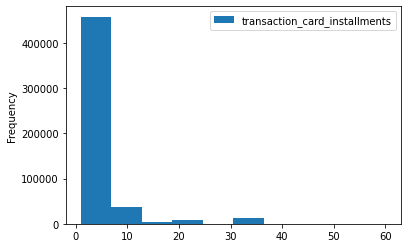

In [ ]:
# How is the distribution of the card installments people buy at, when using credit card?
display(bd.groupby(bd.transaction_card_installments)['transaction_id'].count().sort_values(ascending=False).head(10))
bd[['transaction_card_installments']].plot.hist()

transaction_processing_hour
10    132122
11     84135
9      80884
12     70186
15     69819
14     67717
16     66465
17     62404
13     60379
18     53606
Name: transaction_id, dtype: int64

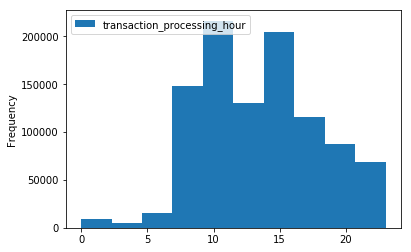

In [ ]:
# What time of the day people buy?
display(bd.groupby(bd.transaction_processing_hour)['transaction_id'].count().sort_values(ascending=False).head(10))
bd[['transaction_processing_hour']].plot.hist()

In [ ]:
# How many different banks are issuing the cards that are used in these transactions?
print(len(bd['transaction_card_issuer_name'].unique())

1834

In [ ]:
# Which are the cards that issue the most cards?
print("No.of.unique values in transaction card issuer name :\n", (bd.transaction_card_issuer_name.value_counts().head(20)))

No.of.unique values in transaction card issuer name :
 Bancolombia                        488604
Banco Davivienda                   127288
Banco De Bogota                     50835
Banco Bbva Colombia S.A.            34745
Codensa Colpatria                   32328
Citibank                            24209
Bbva                                23781
Banco Colpatria                     19649
Scotiabank Colpatria                17291
Falabella                           16714
Banco De Occidente                  16552
Banco Caja Social                   15035
Gana                                14387
Banco Av Villas                     13861
Nequi                               10811
Itaú                                 7383
Banco Itau                           7121
Compania De Financiamiento Tuya      5417
Banco Bogota                         5350
Banco Popular                        4521
Name: transaction_card_issuer_name, dtype: int64


In [ ]:
# Response Code: status of transaction
tr = bd.transaction_response_code.value_counts()
print("No.of.unique values in each column :\n", tr)

No.of.unique values in each column :
 APPROVED    738639
REJECTED    250197
FAILED       11154
PENDING         10
Name: transaction_response_code, dtype: int64


In [ ]:
bd.transaction_dispersion.unique()

array([1])

In [ ]:
bd.transaction_request_language.unique()


array(['ES', 'EN', 'IT', 'PT', 'FR'], dtype=object)

#### Currencies

In [ ]:
bd.transaction_processing_currency.unique()


array(['CRC', 'USD', 'COP', nan], dtype=object)

we find three types of currencies: COP, USD, CCR. Only 89 records have a currency other than COP. In addition to this, the objective is to carry out a recommendation system based on transaction in Colombia. These transactions in other currencies can alter the analysis that we are intended to do, and they are so few records. For that reason it is plausible to eliminate the records that do not have COP as currency instead of converting its value to pesos:

In [ ]:
# We could drop these rows completely:
#bdf=bd[bd['transaction_processing_currency']=='COP']

### User attributes

In [ ]:
CardTypes = bd['transaction_card_type'].unique()
CardTypes

array(['C', 'D', 'A', 'R'], dtype=object)

In [ ]:
len(bd['ip_location_city'].unique())   # 8298 in full dataframe

3867

In [ ]:
len(bd['ip_location_region_name'].unique())    # 1237 in full dataframe

800

In [ ]:
len(bd['ip_location_country'].unique())    

134

In [ ]:
bd['ip_location_country'].unique()

array(['CR', 'CO', 'GB', 'IT', 'EC', 'CA', 'AR', 'US', nan, 'FR', 'MX',
       'DE', 'CL', 'ES', 'PA', 'BR', 'AU', 'NI', 'CH', 'PE', 'VE', 'PT',
       'NL', 'GT', 'BE', 'EE', 'SE', 'NO', 'GQ', 'KY', 'MY', 'IL', 'RS',
       'AE', 'CW', 'KR', 'GR', 'TH', 'KZ', 'UY', 'AT', 'TT', 'JP', 'EG',
       'NZ', 'DO', 'BO', 'SV', 'HU', 'PY', 'ID', 'HN', 'SG', 'QA', 'IN',
       'DK', 'AW', 'IM', 'IQ', 'TN', 'MA', 'VN', 'PR', 'KE', 'BH', 'PH',
       'HK', 'RU', 'PS', 'MT', 'LC', 'BS', 'FI', 'HT', 'IE', 'TR', 'BZ',
       'LU', 'CU', 'KW', 'CZ', 'AL', 'GI', 'SX', 'ZA', 'JO', 'TC', 'RO',
       'ZM', 'NG', 'PL', 'NP', 'SR', 'BB', 'CN', 'AZ', 'SA', 'DZ', 'MM',
       'OM', 'MQ', 'HR', 'LV', 'SI', 'GH', 'MR', 'LB', 'LK', 'LA', 'MO',
       'JM', 'MU', 'UA', 'GY', 'BQ', 'FJ', 'IS', 'BG', 'VG', 'MC', 'BL',
       'MF', 'AG', 'AD', 'CI', 'TW', 'MZ', 'AO', 'GE', 'AF', 'BD', 'LT',
       'GF', 'MN'], dtype=object)

In [ ]:
bd['ip_location_country'].value_counts().head(20)

CO    837176
US     16220
MX      2373
ES      1762
EC      1306
       ...  
MF         1
LT         1
FJ         1
GE         1
AO         1
Name: ip_location_country, Length: 133, dtype: int64

In [ ]:
bd['ip_location_country'].dtype

dtype('O')

In [ ]:
LocationsDF = bd.groupby(["ip_location_country", "ip_location_region_name",'ip_location_city']).size().sort_values(ascending=False).head(20)
LocationsDF

ip_location_country  ip_location_region_name             ip_location_city
CO                   Antioquia                           Medellin            247187
                     Bogota D.C.                         Bogota              192482
                     Departamento Del Valle Del Cauca    Santiago De Cali     70034
                     Atlantico                           Barranquilla         32684
                     Departamento De Santander           Bucaramanga          13959
                     Antioquia                           Envigado             13326
                     Departamento De Bolivar             Cartagena            12255
                     Departamento De Risaralda           Pereira              10588
                     Departamento De Caldas              Manizales             5988
                     Antioquia                           Bello                 5958
                     Cundinamarca                        Chia                  5375
  

### Merchant attributes

In [ ]:
# How many merchants there are?
len(bd['merchant_id'].unique())


567

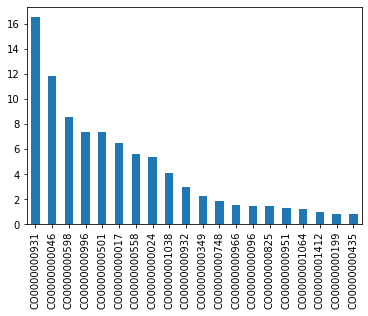

In [ ]:
# Merchant ID

Merchants = bd.merchant_id.value_counts()
len(Merchants)
Merchants=100*Merchants/r
Merchants[0:20].plot(kind='bar')

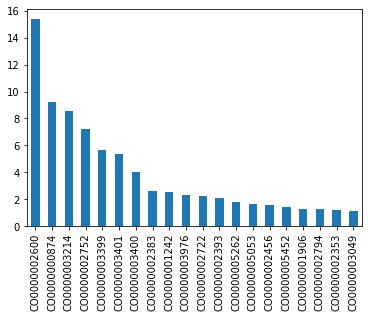

In [ ]:
# Site ID, it is an identifier of the different websites a merchant has
Sites = bd.site_id.value_counts()
len(Sites)
Sites=100*Sites/r
Sites[0:20].plot(kind='bar')

No.of.unique values in each column :
 ACTIVIDADES FINANCIERAS Y DE SEGUROS                                                          42.864257
ADMINISTRACIÃN PÃBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÃN OBLIGATORIA     17.536228
ACTIVIDADES ARTÃSTICAS, DE ENTRETENIMIENTO Y RECREACIÃN                                      7.581199
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÃN DE VEHÃCULOS AUTOMOTORES Y MOTOCICLETAS     6.812189
INFORMACIÃN Y COMUNICACIONES                                                                  5.599173
ACTIVIDADES DE ATENCIÃN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL                             4.957064
ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO                                            4.508059
EDUCACIÃN                                                                                     3.144941
OTRAS ACTIVIDADES DE SERVICIOS                                                                 2.945338
TRANSPORTE Y ALMACENAMIENT

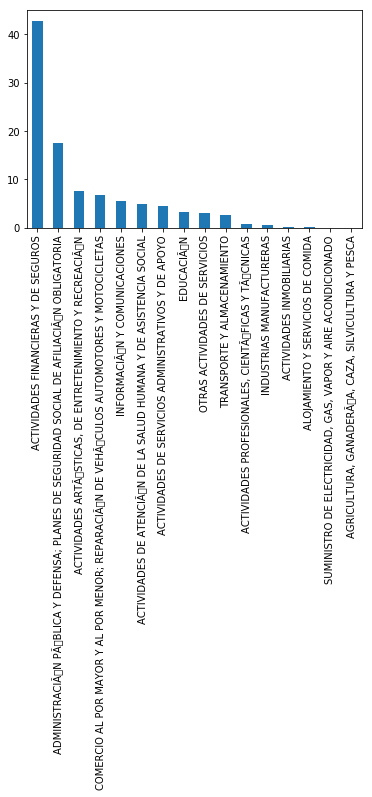

In [ ]:
# Merchant Category (section name)
# Percentage of transaction that are in a merchant division
#bd.isic_section_name.unique()
n3 = bd.isic_section_name.value_counts()
n3=100*n3/Rows
print("No.of.unique values in each column :\n", n3)
n3.plot(kind='bar')

> Some agrupations made in order to see categories and repetitions between the ISIC columns

In [ ]:
# Merchant Category section name and ID
bd_isic_grp = bd.groupby(['isic_section_id','isic_section_name']).size().sort_values(ascending=False).head(20)
bd_isic_grp

isic_section_id  isic_section_name                                                                         
K                ACTIVIDADES FINANCIERAS Y DE SEGUROS                                                          428637
O                ADMINISTRACIÃN PÃBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÃN OBLIGATORIA     175360
R                ACTIVIDADES ARTÃSTICAS, DE ENTRETENIMIENTO Y RECREACIÃN                                      75811
G                COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÃN DE VEHÃCULOS AUTOMOTORES Y MOTOCICLETAS     68121
J                INFORMACIÃN Y COMUNICACIONES                                                                  55991
Q                ACTIVIDADES DE ATENCIÃN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL                             49570
N                ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO                                            45080
P                EDUCACIÃN                                       

In [ ]:
# How many merchant categories there are?
len(bd['isic_division_id'].unique())

53

In [ ]:
# How many subcategories of merchants there are?
len(bd['isic_division_name'].unique())

53

In [ ]:
# Are the categories Ids and Descriptions coding the same variable?
len(bd.groupby(['isic_division_id','isic_division_name']))

81

In [ ]:
# Merchant Subategory Division name and ID
DivisionDF = bd.groupby(["isic_division_id", "isic_division_name"]).size().sort_values(ascending=False).head(20)
DivisionDF

isic_division_id  isic_division_name                                                
65.0              Seguros y fondos de pensiones                                         364071
84.0              AdministraciÃ³n pÃºblica y defensa                                    175360
93.0              Actividades deportivas                                                 70991
47.0              Comercio al por menor                                                  61998
64.0              Servicios financieros                                                  56199
79.0              Agencias de viajes y operadores turÃ­sticos                            41569
85.0              EducaciÃ³n                                                             31449
94.0              Actividades de asociaciones                                            27860
86.0              Actividades de atenciÃ³n de la salud humana                            24843
88.0              Actividades de asistencia social sin aloja

In [ ]:
# Percentage of transaction that are in a merchant subcategory (division)
n=100*DivisionDF/Rows
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 isic_division_id  isic_division_name                                                
65.0              Seguros y fondos de pensiones                                         36.407573
84.0              AdministraciÃ³n pÃºblica y defensa                                    17.536228
93.0              Actividades deportivas                                                 7.099192
47.0              Comercio al por menor                                                  6.199881
64.0              Servicios financieros                                                  5.619973
79.0              Agencias de viajes y operadores turÃ­sticos                            4.156954
85.0              EducaciÃ³n                                                             3.144941
94.0              Actividades de asociaciones                                            2.786036
86.0              Actividades de atenciÃ³n de la salud humana                            2.48

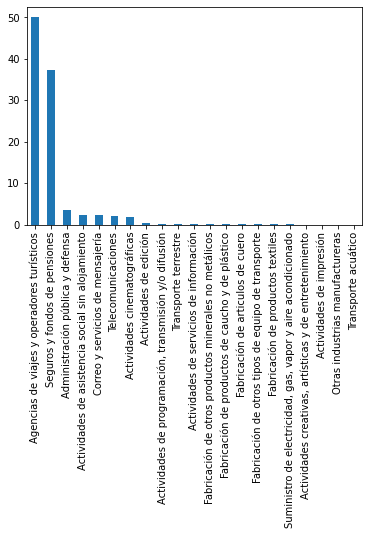

In [ ]:
n.plot(kind='bar')

In [ ]:
# Which merchants are in each subcategory?
DivisionDF2 = bd.groupby([ "isic_division_id",'merchant_id']).size().sort_values(ascending=False).head(20)
DivisionDF2

isic_division_id  merchant_id 
65.0              CO0000000996    95195
                  CO0000000598    69787
93.0              CO0000001148    61727
65.0              CO0000000017    61701
47.0              CO0000000706    55508
84.0              CO0000000199    50692
65.0              CO0000000558    50045
                  CO0000000024    49253
84.0              CO0000000235    42768
                  CO0000000435    31173
88.0              CO0000000349    24727
64.0              CO0000000992    22035
84.0              CO0000000390    19753
64.0              CO0000001439    17998
61.0              CO0000000825    17235
59.0              CO0000000748    14754
65.0              CO0000000966    13776
79.0              CO0000000931    13750
53.0              CO0000001064    13743
84.0              CO0000000497    13418
dtype: int64

In [ ]:
# How many transactions have each merchant in each subcategory?
MerchantsDF = bd.groupby(["isic_division_id",'merchant_id'])["transaction_id"].count().reset_index(name="count")
MerchantsDF

,isic_division_id,merchant_id,count
0,13.0,CO0000000976,106
1,13.0,CO0000001337,35
2,15.0,CO0000000609,257
3,18.0,CO0000000494,42
4,18.0,CO0000001504,66
...,...,...,...
171,84.0,CO0000001543,45
172,88.0,CO0000000349,22968
173,90.0,CO0000000544,51
174,90.0,CO0000001298,57


No.of.unique values in each column :
 Bogota              61.7850
Medellin            34.7994
Cali                 2.3558
Barranquilla         0.3351
Bucaramanga          0.1289
Armenia              0.1189
Sabaneta             0.1062
Pereira              0.0857
Quimbaya             0.0474
Santa Marta          0.0413
Cucuta               0.0345
Envigado             0.0278
Cartagena            0.0253
Monteria             0.0245
Yopal                0.0235
Guarne               0.0211
Itagui               0.0112
La Estrella          0.0066
San Andres Islas     0.0059
Soledad              0.0045
San Jose             0.0033
Manizales            0.0030
Marinilla            0.0030
Moravia              0.0011
Puerto Asis          0.0010
Name: merchant_address_city, dtype: float64


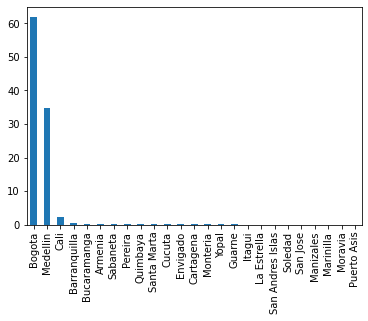

In [ ]:
# City where the Merchant is registered.
#bd.merchant_address_city.unique()
Merchant_City = bd.merchant_address_city.value_counts()
Merchant_City=100*Merchant_City/r
print("No.of.unique values in each column :\n", Merchant_City)
Merchant_City.plot(kind='bar')

In [ ]:
# Channels:
bd.site_channel.value_counts()

INTERNET    896453
POS         102029
IVR           1518
Name: site_channel, dtype: int64

In [ ]:
# Site Categories
bd.site_category.value_counts()

Recaudo       741612
E-Commerce    258388
Name: site_category, dtype: int64

In [ ]:
# Site Classification
bd.site_classification.value_counts()

E-Commerce    670338
Recaudo       329656
Name: site_classification, dtype: int64

In [ ]:
# Status of the merchant
bd.merchant_enabled.unique()


array(['Activo', 'Inactivo'], dtype=object)

In [ ]:
#How many transactions were made to inactive Merchants?
bd[bd['merchant_enabled']=='Inactivo']['merchant_classification'].value_counts()

B    2141
C     838
Name: merchant_classification, dtype: int64

In [ ]:
#How many transactions were made to wich Sites of inactive Merchants?
bd[bd['merchant_enabled']=='Inactivo']['site_channel'].value_counts()

INTERNET    2677
POS           48
Name: site_channel, dtype: int64

# Attributes Dictionary

After reviewing all the columns and their respective types, now we are going to show this data and their respective description.

 For this we build a Columns Dictionary, where we describe all the attributes and its values, confronting  this information with the dictionary the company sent us.

This data set contains 47 fields, that can be grouped as attributes to different variables:


 **Transaction Attributes:**

| Field          | Type         | Description  |
| :------------- | :----------: | -----------: |
|transaction_id                  | STRING          | Transaction ID  |
|transaction_description         | STRING          | Destails of purchase / product, depends on merchants interpretation
|transaction_processing_date     | STRING ->DATE   | Date transaction was performed  
|transaction_processing_hour     | INTEGER         | Hour of transaction  
|transaction_request_language    | STRING          | 
|transaction_business_model      | STRING          |Gateway the money goes to the store accounts. 
| | | Aggregator the money goes to the Placetopay accounts. 
| | | Aggregator is usually used for medium-high risk merchants
|transaction_processing_currency | STRING          |Currency in which the transaction was made
|transaction_processing_amount   | STRING ->FLOAT  | Purchase value, transaction amount
|transaction_card_issuer_name    | STRING          |Bank issuing the card
|transaction_card_type           | STRING          |type of card C-Credito, D-Debito, A-Ahorros, R-Corriente
|transaction_card_installments   | INTEGER         |#of installments paid (only applies to credit card)
|transaction_response_code       | STRING          |Respose code of the system. 
| | | 'APPROVED' 'REJECTED' 'PENDING' 'FAILED'
|transaction_country             | STRING          |Ignore this field, all are ‘CO’
|transaction_dispersion          | INTEGER         |0 = the transaction belongs to a travel agency
| | | 1 = the transaction can belong to any other type of business
|reason_code_iso                 | STRING          | Response code, by risk control policies 
|reason_description              | STRING          |Description of the response 
| | | 'Aprobada' 'Declinada' 'Pendiente’  nan 'Invalido’
|reason_clasiffication           | STRING          | Who gave the respose: Control data / Merchant / 
| | | Network / Bank / Risk control policies / PlacetoPay
|paymentmethod_name              | STRING          |Name of the payment method
|paymentmethod_franchise         | STRING          |Associated Frachise
|paymentmethod_type              | STRING          |Type of payment method |


 **User Attributes**  

| Field          | Type         | Description  |
| :------------- | :----------: | -----------: |
| transaction_user_agent        | STRING          |Device from which the transaction was made   
| transaction_payer_id          | STRING          |Payer ID number (ID, passport, etc.), hashed
| transaction_payer_document_type| STRING         |Document type (CC, NIT, etc) |
| Transaction_payer_email       | STRING          |Payer Email, hashed
| IP                            | STRING          |IP IP from where the transaction is made
| Ip_location_country           | STRING          |Country from where the transaction was made
| Ip_location_region_name       | STRING          |Region from where the transaction was made
| Ip_location_city              | STRING          |City from where the transaction was made
| Card_id                       | STRING          |Card number, hashed
| card_issuer_country           | STRING          |Country of issuing bank
| Card_class                    | STRING          |Card class
| Card_country                  | STRING          |Country of card issuance



 **Merchant Attributes**  

| Field          | Type          | Description  |
| :------------- | :-----------: | -----------: |
| Merchant_id               | INTEGER         |Identifier of the Merchant / Store ID where transaction was made
| | | (Remember that a business can have n number of sites)
| Merchant_enabled          | STRING          |If the merchant is active or not to date
| Merchant_address_city     | STRING          |City where the business is located
| Merchant_address_country  | STRING          |Country where the business is located
| Merchant_created          | STRING          |Date of activation of the merchant in the platform
| Merchant_classification   | STRING          |A + = More than 50k average transactions per month
| | |A = Between 10k and 50k
| | |B + = between 5k and 10k
| | |B = Between 2k and 5k
| | |N = Created in the current year
| Site_id                   | STRING          |Unique identifier of the site
| Site_channel              | STRING          |Channel through which the transaction was made:
| | |INTERNET = Non-face-to-face transaction (online)
| | |IVR = Transaction by telephone
| | |POS = Transaction made from a physical terminal
| Site_category             | STRING          |Site category
| Site_classification       | STRING          |seguros, smarty, ecomerce, government  
| Isic_division_id          | INTEGER         |Id of the business sub-activity of the merchant 
| Isic_division_name        | FLOAT           |name of Business activity of the merchant 
| Isic_section_id           | FLOAT           |id of the economic activity of the merchant
| Isic_section_name         | FLOAT           |name of the merchant's economic activity of the merchant




## Non Informing Columns

In this section we are going to take a look at the information the different attributes convey. In some cases it has no meaning for us, in others we dont know the reason it has been coded differently.|

In [ ]:
# Are the categories Ids and Descriptions coding the same variable? (each has only 2 different values)
len(bd.groupby(['site_classification','site_category']))

5

In [ ]:
# Merchant Site category and classification are the same variable as transaction_business_model?
SiteClass = bd.groupby(['transaction_business_model','site_classification','site_category']).size().sort_values(ascending=False).head(20)
SiteClass

transaction_business_model  site_classification  site_category
Gateway                     Recaudo              Recaudo          434750
                            E-Commerce           Recaudo          327171
                            Recaudo              E-Commerce       139488
                            E-Commerce           E-Commerce        77729
Agregador                   E-Commerce           Recaudo           10059
                                                 E-Commerce         8223
                            Recaudo              E-Commerce         1752
                                                 Recaudo             812
dtype: int64

So, in regards to `'transaction_business_model','site_classification','site_category'` We are not sure what does this means, or what can we do with this three attributes information.

In [ ]:
# Are paymentmethod_type and transaction_card_type coding the same variable? (each one has 4 different values)
len(bd.groupby(['paymentmethod_type','transaction_card_type']))

8

In [ ]:
# Are paymentmethod_franchise and paymentmethod_name coding the same variable?
len(bd.groupby(['paymentmethod_franchise','paymentmethod_name']))

21

In [ ]:
# Are those 4 attributes coding the same information about the type of card and the payment method?
SiteClass = bd.groupby(['paymentmethod_type','paymentmethod_franchise','paymentmethod_name','transaction_card_type']).size().sort_values(ascending=False).head(20)
SiteClass

paymentmethod_type  paymentmethod_franchise  paymentmethod_name     transaction_card_type
CREDITCARD          VISA                     Visa                   C                        198689
                    MASTERCARD               MasterCard             C                        139366
                    AMEX                     American Express       C                         23897
                    DINERS                   Diners Club            C                          5424
                    VISA                     Visa Electron          A                           176
                    MASTERCARD               Transerver Mastercard  C                             5
                    VISA                     Transerver Visa        C                             4
                    MASTERCARD               MasterCard             A                             4
                    VISA                     Visa Electron          R                             2
          

So yes, indeed, the column `paymentmethod_name` doesnt have any new information. Electron is a phased out technology and Transerver doesnt have any meaning for us, and together, the transactions that have this values as attribute are only 0.0187% of the total number of transactions in this sample. 

Nevertheless, there is still information about different banks in the transactions that are not marked as 'CREDITCARD'

In [ ]:
# Is there any payment by card that is not 'CREDITCARD'?
bd.groupby(['transaction_card_type', 'paymentmethod_type', "paymentmethod_franchise"]).count()

ï»¿transaction_user_agent  \
transaction_card_type paymentmethod_type paymentmethod_franchise                              
A                     CREDITCARD         MASTERCARD                                       4   
                                         VISA                                           176   
C                     CREDITCARD         AMEX                                         23897   
                                         DINERS                                        5424   
                                         DISCOVER                                         2   
                                         MASTERCARD                                  139371   
                                         VISA                                        198693   
R                     CREDITCARD         MASTERCARD                                       2   
                                         VISA                                             2   

                                                                  transaction_id  \
transaction_card_type paymentmethod_type paymentmethod_franchise                   
A                     CREDITCARD         MASTERCARD                            4   
                                         VISA                                176   
C                     CREDITCARD         AMEX                              23897   
                                         DINERS                             5424   
                                         DISCOVER                              2   
                                         MASTERCARD                       139371   
                                         VISA                             198693   
R                     CREDITCARD         MASTERCARD                            2   
                                         VISA                                  2   

                                                                  transaction_description  \
transaction_card_type paymentmethod_type paymentmethod_franchise                            
A                     CREDITCARD         MASTERCARD                                     4   
                                         VISA                                         176   
C                     CREDITCARD         AMEX                                       23897   
                                         DINERS                                      5424   
                                         DISCOVER                                       2   
                                         MASTERCARD                                139371   
                                         VISA                                      198693   
R                     CREDITCARD         MASTERCARD                                     2   
                                         VISA                                           2   

                                                                  transaction_processing_date_  \
transaction_card_type paymentmethod_type paymentmethod_franchise                                 
A                     CREDITCARD         MASTERCARD                                          4   
                                         VISA                                              176   
C                     CREDITCARD         AMEX                                            23897   
                                         DINERS                                           5424   
                                         DISCOVER                                            2   
                                         MASTERCARD                                     139371   
                                         VISA                                           198693   
R                     CREDITCARD         MASTERCARD                                          2   
                                         VISA                                              

In [ ]:
# What about the other payments that are not 'CREDITCARD'?
bd[bd['paymentmethod_type']!='CREDITCARD'].groupby(['transaction_card_type',"card_class",'paymentmethod_type']).count()

transaction_user_agent  \
transaction_card_type card_class         paymentmethod_type                           
C                     AMERICAN EXPRESS   CASH                                   NaN   
                                         DEBITACCOUNT                           NaN   
                                         E-WALLET                               NaN   
                                         PRIVATECARD                            NaN   
                      ATM ONLY           CASH                                   NaN   
...                                                                             ...   
D                     WORLD EMBOSSED     PRIVATECARD                            NaN   
                      WORLD FOR BUSINESS CASH                                   NaN   
                                         DEBITACCOUNT                           NaN   
                                         E-WALLET                               NaN   
                                         PRIVATECARD                            NaN   

                                                             transaction_id  \
transaction_card_type card_class         paymentmethod_type                   
C                     AMERICAN EXPRESS   CASH                           NaN   
                                         DEBITACCOUNT                   NaN   
                                         E-WALLET                       NaN   
                                         PRIVATECARD                    NaN   
                      ATM ONLY           CASH                           NaN   
...                                                                     ...   
D                     WORLD EMBOSSED     PRIVATECARD                    NaN   
                      WORLD FOR BUSINESS CASH                           NaN   
                                         DEBITACCOUNT                   NaN   
                                         E-WALLET                       NaN   
                                         PRIVATECARD                    NaN   

                                                             transaction_description  \
transaction_card_type card_class         paymentmethod_type                            
C                     AMERICAN EXPRESS   CASH                                    NaN   
                                         DEBITACCOUNT                            NaN   
                                         E-WALLET                                NaN   
                                         PRIVATECARD                             NaN   
                      ATM ONLY           CASH                                    NaN   
...                                                                              ...   
D                     WORLD EMBOSSED     PRIVATECARD                             NaN   
                      WORLD FOR BUSINESS CASH                                    NaN   
                                         DEBITACCOUNT                            NaN   
                                         E-WALLET                                NaN   
                                         PRIVATECARD                             NaN   

                                                             transaction_processing_date_  \
transaction_card_type card_class         paymentmethod_type                                 
C                     AMERICAN EXPRESS   CASH                                         NaN   
                                         DEBITACCOUNT                                 NaN   
                                         E-WALLET                                     NaN   
                                         PRIVATECARD                                  NaN   
                      ATM ONLY           CASH                                         NaN   
...                                                                                   ...   
D           

In [ ]:
# How much money are payed in 'CASH'?
bd[bd['paymentmethod_type']=='CASH'].groupby(['transaction_card_type', 'paymentmethod_type']).agg({'transaction_processing_amount':['min','mean','max','count', 'sum']})

transaction_processing_amount  \
                                                                   min   
transaction_card_type paymentmethod_type                                 
D                     CASH                                     11200.0   

                                                                           \
                                                  mean          max count   
transaction_card_type paymentmethod_type                                    
D                     CASH                2.686523e+07  848897000.0  3973   

                                                        
                                                   sum  
transaction_card_type paymentmethod_type                
D                     CASH                1.067356e+11

The following columns have irrelevant information, or they have no information at all. So they have no value for our purpose, so we decided to drop these columns. 

In [ ]:
# How many transactions are registered to a merchant based in Costa Rica?
bd.groupby('merchant_address_country').count()

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_request_language,transaction_payer_id,transaction_payer_document_type,transaction_payer_email,IP,...,reason_code_iso,reason_description,reason_clasiffication,paymentmethod_name,paymentmethod_franchise,paymentmethod_type,isic_division_id,isic_division_name,isic_section_id,isic_section_name
merchant_address_country,,,,,,,,,,,,,,,,,,,,,
CO,999980,999980,923427,999980,999980,999980,999980,892516,999980,999980,...,999694,999694,999694,999980,367564,999980,999958,999958,999958,999958
CR,7,7,7,7,7,7,7,7,7,7,...,6,6,6,7,7,7,0,0,0,0


In [ ]:
bd[bd['merchant_address_country']=="CR"][FloatCols + CategoricalCols]

,merchant_id,site_id,transaction_processing_currency,transaction_payer_id,transaction_payer_email,IP,card_id,transaction_payer_document_type,transaction_card_installments,transaction_processing_amount,transaction_response_code,site_channel,transaction_card_type,paymentmethod_name,paymentmethod_franchise,paymentmethod_type
0,CO0000001797,CO0000006478,CRC,"IUAE(,>""%&@IPA->+UM58^?!+IM?E^6.T6Q,:OE&PR9",OB:6$X[5R&1Q24:K2;$<Z[*-'J#4D>8WW4I<](_1P%#,"L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",494D48C20106C60A55056B4009D76407CAF44D7F,CRCPF,1.0,"650,00",PENDING,INTERNET,C,Transerver Visa,VISA,CREDITCARD
1,CO0000001632,CO0000006276,CRC,"FZ0#UZ`R')9'I8A^4$D$7_/\*U=@G(CGY[#55S`[,!@","F_NL4'KE7W!AS+M[,M2FNKTSW$5DT)<$8X-X\RP^'W=",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,287FA930C343D37E1A00337C8183CA4DF4171727,CRCPF,1.0,"847,50",APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD
2,CO0000001822,CO0000006545,CRC,"E2V$P7RRC*Y(++?LYMU'7PJ'M,`>J2FG8B&P$+D;=""`","H5E](/""$)@;I./=VC_RTXK'884Z:FN\:+QW]CJ4U&O+",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,09A7E2C4DCF87D5332068775C5F5C4AD5FBD7FFB,CRCPF,NaN,"1,00",REJECTED,INTERNET,C,Transerver Visa,VISA,CREDITCARD
3,CO0000001632,CO0000005835,USD,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",2EECA22FFFC3D1A2F53953563B7925FAE4F8FD56,CC,1.0,"1,00",APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD
4,CO0000001632,CO0000005835,USD,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",2EECA22FFFC3D1A2F53953563B7925FAE4F8FD56,CC,1.0,"1,00",APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD
5,CO0000001632,CO0000005835,USD,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",2EECA22FFFC3D1A2F53953563B7925FAE4F8FD56,CC,1.0,"1,00",APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD
6,CO0000001797,CO0000006478,CRC,"D.B>""GH7@2U';:]7L?Y""KAX2KQ=3>H$E&%W<=:[L+%4","O`>CT'APF_+(_E&_`=&!#68:+%^=6R;L<Z4L!=>""_LO","L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",6312B8529AD8CA235BF9E09EF1A54D9E4D61B275,CRCPF,1.0,"123,00",APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD


In [ ]:
# How many transactions are made in Colones from Costa Rica or dollars?
bd[bd['transaction_processing_currency']!='COP'][FloatCols + CategoricalCols]

,merchant_id,site_id,transaction_processing_date_,transaction_processing_amount,transaction_processing_currency,transaction_payer_document_type,transaction_card_installments,transaction_response_code,site_channel,transaction_card_type,paymentmethod_name,paymentmethod_franchise,paymentmethod_type,transaction_payer_id,transaction_payer_email,IP,card_id
0,CO0000001797,CO0000006478,02/09/2020,"650,00",CRC,CRCPF,1.0,PENDING,INTERNET,C,Transerver Visa,VISA,CREDITCARD,"IUAE(,>""%&@IPA->+UM58^?!+IM?E^6.T6Q,:OE&PR9",OB:6$X[5R&1Q24:K2;$<Z[*-'J#4D>8WW4I<](_1P%#,"L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",494D48C20106C60A55056B4009D76407CAF44D7F
1,CO0000001632,CO0000006276,21/08/2020,"847,50",CRC,CRCPF,1.0,APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD,"FZ0#UZ`R')9'I8A^4$D$7_/\*U=@G(CGY[#55S`[,!@","F_NL4'KE7W!AS+M[,M2FNKTSW$5DT)<$8X-X\RP^'W=",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,287FA930C343D37E1A00337C8183CA4DF4171727
2,CO0000001822,CO0000006545,16/09/2020,"1,00",CRC,CRCPF,NaN,REJECTED,INTERNET,C,Transerver Visa,VISA,CREDITCARD,"E2V$P7RRC*Y(++?LYMU'7PJ'M,`>J2FG8B&P$+D;=""`","H5E](/""$)@;I./=VC_RTXK'884Z:FN\:+QW]CJ4U&O+",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,09A7E2C4DCF87D5332068775C5F5C4AD5FBD7FFB
3,CO0000001632,CO0000005835,31/03/2020,"1,00",USD,CC,1.0,APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",2EECA22FFFC3D1A2F53953563B7925FAE4F8FD56
4,CO0000001632,CO0000005835,31/03/2020,"1,00",USD,CC,1.0,APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",2EECA22FFFC3D1A2F53953563B7925FAE4F8FD56
5,CO0000001632,CO0000005835,31/03/2020,"1,00",USD,CC,1.0,APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD,"K[`JBNB5$Y?Y!]*&Q""/S*&V0N4/';@0^]);6D\X#7I-",F[/>W+UKJZQU.*+G)0DX-^33IT$B]'CQV4NLKB+%O0+,"D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",2EECA22FFFC3D1A2F53953563B7925FAE4F8FD56
6,CO0000001797,CO0000006478,02/09/2020,"123,00",CRC,CRCPF,1.0,APPROVED,INTERNET,C,Transerver Mastercard,MASTERCARD,CREDITCARD,"D.B>""GH7@2U';:]7L?Y""KAX2KQ=3>H$E&%W<=:[L+%4","O`>CT'APF_+(_E&_`=&!#68:+%^=6R;L<Z4L!=>""_LO","L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",6312B8529AD8CA235BF9E09EF1A54D9E4D61B275
179836,CO0000000421,CO0000004327,15/08/2020,"0,00",NaN,PPN,1.0,PENDING,INTERNET,C,Visa,VISA,CREDITCARD,K'UOLC$S_I9H(+^](_7CY^!WT14BOEU`F4[MDQY54<),"J,QC#P5]I=#+)1\9.K\;*1;\F>D09^UZ+XD7+""LG^IR","O+],>=;7?=PD]Q]L,=)+.(.NI<!H%G$DCY?<.=_`KMG).....",6B0FC67576E1962AE619BC5D5C5F3A6DAC4BAC50
351865,CO0000001348,CO0000004587,04/07/2020,"274,28",USD,CC,NaN,REJECTED,INTERNET,C,PayPal,NaN,E-WALLET,"BJ)XE)/ZD*0A6!UW_17657]5$%R9V:6/,AOUW^%563D","L\3/4D??IRFR""/RGJU9!+'56XRY.;\""MU'HIX4O0_U.","PLRI+XO!0$6-#""1G`FPN]$.L%KHCA7PP$6I(Q6Y?NTO]$....",NaN
371766,CO0000000381,CO0000005756,25/08/2020,"1,00",CRC,CC,1.0,REJECTED,POS,C,Transerver Visa,VISA,CREDITCARD,"B#?!'*OO(GVP$ZJ<F)6.WGZ"";;5AJR<$Z""S5]`&ZQP0","A2850HM5?Z1<5S)6)!'6K@*>(51?EEBR3X,2OP_>&JD","D\A""`H@+T#6AS%G6HT(M]$.D=Q8%K_O^#61?``LW5>`]$....",3BDDE4CE2D91A538DFE5E94ECA8383A5CA1FF935


So, we are going to drop `'merchant_address_country'` and `´transaction_processing_currency'`  columns too. but first we have to convert thir ammounts to COP.


In [ ]:
# Converting Ammounts to exchange rates. This can be improved using the exchange rate of the date of transaction. 
# but for now, we are going to use just the mean of the period, in this case, for this month:
# CRC to COP: 6.34575
# USD to COP: 3821.73183

#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

#ammounts = bd['transaction_processing_amount']
#bd.loc[(bd['transaction_processing_currency']=='CRC'),'transaction_processing_amount']=1
#bd.loc[(bd['transaction_processing_currency']=='CRC'), 'transaction_processing_amount'].values*6.34

bd.loc[bd['transaction_processing_currency']=='CRC', 'transaction_processing_amount'] = bd[bd['transaction_processing_currency']=='CRC'][['transaction_processing_amount']].apply(lambda num : num*6.345)

bd.loc[bd['transaction_processing_currency']=='USD', 'transaction_processing_amount'] = bd[bd['transaction_processing_currency']=='USD'][['transaction_processing_amount']].apply(lambda num : num*3821.7)

#The following doesnt work, changes all rows:
#bd.transaction_processing_amount = bd.transaction_processing_amount.where(bd.transaction_processing_currency=='USD', bd.transaction_processing_amount*3821.7, inplace=True)


In [ ]:
# How many transactions are made from rare locations?
bd.groupby(['ip_location_country','ip_location_region_name','ip_location_city']).count().tail(200)

transaction_user_agent  \
ip_location_country ip_location_region_name ip_location_city                                 
US                  Texas                   Alamo                                        1   
                                            Allen                                        4   
                                            Arlington                                    7   
                                            Aubrey                                       2   
                                            Austin                                      14   
...                                                                                    ...   
VE                  Zulia                   Barrio Doce De Octubre                       1   
                                            Maracaibo                                    6   
VN                  Hanoi                   Hanoi                                        1   
ZA                  Gauteng                 Johannesburg                                 3   
                    Western Cape            Cape Town                                    1   

                                                                    transaction_id  \
ip_location_country ip_location_region_name ip_location_city                         
US                  Texas                   Alamo                                1   
                                            Allen                                4   
                                            Arlington                            7   
                                            Aubrey                               2   
                                            Austin                              14   
...                                                                            ...   
VE                  Zulia                   Barrio Doce De Octubre               1   
                                            Maracaibo                            6   
VN                  Hanoi                   Hanoi                                1   
ZA                  Gauteng                 Johannesburg                         3   
                    Western Cape            Cape Town                            1   

                                                                    transaction_description  \
ip_location_country ip_location_region_name ip_location_city                                  
US                  Texas                   Alamo                                         1   
                                            Allen                                         4   
                                            Arlington                                     7   
                                            Aubrey                                        2   
                                            Austin                                       12   
...                                                                                     ...   
VE                  Zulia                   Barrio Doce De Octubre                        1   
                                            Maracaibo                                     6   
VN                  Hanoi                   Hanoi                                         1   
ZA                  Gauteng                 Johannesburg                                  3   
                    Western Cape            Cape Town                                     1   

                                                                    transaction_processing_date_  \
ip_location_country ip_location_region_name ip_location_city                                       
US                  Texas                   Alamo                                              1   
                                            Allen                                              4   
                                            Arlington                                     

In [ ]:
# How many transactions are made in foreign languages?
bd.groupby('transaction_request_language').count()

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_payer_id,transaction_payer_document_type,transaction_payer_email,IP,transaction_business_model,...,reason_code_iso,reason_description,reason_clasiffication,paymentmethod_name,paymentmethod_franchise,paymentmethod_type,isic_division_id,isic_division_name,isic_section_id,isic_section_name
transaction_request_language,,,,,,,,,,,,,,,,,,,,,
EN,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,...,1381,1381,1381,1382,652,1382,1381,1381,1381,1381
ES,998575,998575,922022,998575,998575,998575,891111,998575,998575,998575,...,998289,998289,998289,998575,366904,998575,998548,998548,998548,998548
FR,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,5,13,12,12,12,12
IT,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
PT,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,6,13,13,13,13,13


In [ ]:
#transaction_request_language
bd.groupby(['card_country','transaction_request_language']).count()


transaction_user_agent  \
card_country transaction_request_language                           
CO           EN                                               642   
             ES                                            396880   
             FR                                                 5   
             IT                                                 1   
             PT                                                 2   
EC           EN                                                 1   
             ES                                               358   

                                           transaction_id  \
card_country transaction_request_language                   
CO           EN                                       642   
             ES                                    396880   
             FR                                         5   
             IT                                         1   
             PT                                         2   
EC           EN                                         1   
             ES                                       358   

                                           transaction_description  \
card_country transaction_request_language                            
CO           EN                                                642   
             ES                                             326833   
             FR                                                  5   
             IT                                                  1   
             PT                                                  2   
EC           EN                                                  1   
             ES                                                323   

                                           transaction_processing_date_  \
card_country transaction_request_language                                 
CO           EN                                                     642   
             ES                                                  396880   
             FR                                                       5   
             IT                                                       1   
             PT                                                       2   
EC           EN                                                       1   
             ES                                                     358   

                                           transaction_processing_hour  \
card_country transaction_request_language                                
CO           EN                                                    642   
             ES                                                 396880   
             FR                                                      5   
             IT                                                      1   
             PT                                                      2   
EC           EN                                                      1   
             ES                                                    358   

                                           transaction_payer_id  \
card_country transaction_request_language                         
CO           EN                                             642   
             ES                                          396880   
             FR                                               5   
             IT                                               1   
             PT                                               2   
EC           EN                                               1   
             ES                                             358   

                                           transaction_payer_document_type  \
card_country transaction_request_language                                    
CO           EN                                                        642   
             ES                                            

In [ ]:
bd['card_issuer_country'].value_counts()

CO    370574
US      7488
MX       561
CA       538
ES       447
       ...  
BH         1
VG         1
GE         1
GY         1
JO         1
Name: card_issuer_country, Length: 104, dtype: int64

In [ ]:
bd['card_country'].value_counts()

CO    398148
EC       405
Name: card_country, dtype: int64

In [ ]:
# Are 'card_country' and 'card_issuer_country' coding the same variable?
bd.groupby(['card_country','card_issuer_country']).count()

transaction_user_agent  transaction_id  \
card_country card_issuer_country                                           
CO           AD                                        2               2   
             AE                                       42              42   
             AF                                        3               3   
             AN                                        1               1   
             AR                                      250             250   
...                                                  ...             ...   
EC           GB                                        1               1   
             KY                                        1               1   
             PL                                        8               8   
             RU                                        1               1   
             US                                       97              97   

                                  transaction_description  \
card_country card_issuer_country                            
CO           AD                                         2   
             AE                                        38   
             AF                                         0   
             AN                                         1   
             AR                                       203   
...                                                   ...   
EC           GB                                         1   
             KY                                         1   
             PL                                         8   
             RU                                         1   
             US                                        83   

                                  transaction_processing_date_  \
card_country card_issuer_country                                 
CO           AD                                              2   
             AE                                             42   
             AF                                              3   
             AN                                              1   
             AR                                            250   
...                                                        ...   
EC           GB                                              1   
             KY                                              1   
             PL                                              8   
             RU                                              1   
             US                                             97   

                                  transaction_processing_hour  \
card_country card_issuer_country                                
CO           AD                                             2   
             AE                                            42   
             AF                                             3   
             AN                                             1   
             AR                                           250   
...                                                       ...   
EC           GB                                             1   
             KY                                             1   
             PL                                             8   
             RU                                             1   
             US                                            97   

                                  transaction_request_language  \
card_country card_issuer_country                                 
CO           AD                                              2   
             AE                                             42   
             AF                                              3   
             AN                                              1   
             AR                                            250   
...                                                        ...   
EC           GB   

In [ ]:
#Concatenate columns that are coding the same categorical variable:

bd['isic_section_name'] = bd['isic_section_id'] + '-' + bd['isic_section_name']
bd['isic_division_name'] = bd['isic_division_id'].astype(str) + '-' + bd['isic_division_name']
bd['isic_division_name'] = bd['isic_division_name'].str.replace('\.0-','-')

Continuing with the analisys, we found that the column 'transaction_payer_id' the register (payer) identified with the hash  'NI<!H%G$DCY?<.=_`KMG)X6XVZ5M(>,_+*7L6U4B(DS' had 	1325459 transactions. We asked the company PayPlacetoPlay and they told us that this register is Null, but in the process of hashing Null is converted to this value. 

So, we started to research this registers and after looking to other variables as 'transaction_payer_email'and 'transaction_payer_ip' we found that most of the time the registers had also Null in the email and IP field. We cannot assert that this transactions are related to different users or to the same user in different IP, or email. We cannot say with certainity that this users are Null for any other reason. So Null doesnt have a clear meaning.

## Find Nulls and NaNs

In [ ]:
bd.isnull().any()

transaction_user_agent             False
transaction_id                     False
transaction_description             True
transaction_processing_date_       False
transaction_processing_hour        False
transaction_request_language       False
transaction_payer_id               False
transaction_payer_document_type     True
transaction_payer_email            False
IP                                 False
transaction_business_model         False
transaction_processing_currency     True
transaction_processing_amount      False
transaction_card_issuer_name        True
transaction_card_type              False
transaction_card_installments       True
transaction_response_code          False
transaction_country                False
transaction_dispersion             False
site_id                            False
site_channel                       False
site_category                      False
site_classification                 True
merchant_id                        False
merchant_enabled

Now, checking the Nulls, for each column:

In [ ]:
bd.columns

Index(['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_payer_email', 'IP',
       'transaction_processing_amount', 'transaction_card_issuer_name',
       'transaction_card_type', 'transaction_card_installments',
       'transaction_response_code', 'site_id', 'site_channel', 'merchant_id',
       'merchant_enabled', 'merchant_address_city', 'merchant_created',
       'merchant_classification', 'ip_location_country',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country',
       'paymentmethod_franchise', 'paymentmethod_type', 'isic_division_id',
       'isic_division_name', 'isic_section_id', 'isic_section_name'],
      dtype='object')

In [ ]:
bd[bd['transaction_user_agent']=='0'][HashedCols + FloatCols + CategoricalCols]

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_payer_document_type,transaction_processing_amount,transaction_card_issuer_name,transaction_card_type,transaction_card_installments,transaction_response_code,...,site_id,site_channel,merchant_classification,card_class,paymentmethod_franchise,paymentmethod_type,transaction_payer_id,transaction_payer_email,IP,card_id
11,0,COA1483961357,14549858,2020-02-24,CC,83060.0,Finandina,C,2.0,APPROVED,...,CO0000002600,INTERNET,A+,Platinum,VISA,CREDITCARD,"O?1&90'>Y5B1Q$]#UO?)N""!_<&986#5HVI*6>O'4U>0","K/L;JC&G1%)/%(1H-:I-`*TDLS>,Z=`BN0VS/WJ$-KJ","D\A""`H@+T#6AS%G6HT(M]$.P9E_-`""SX$6]U9!Y:/IH]$....",6F5E2D76404F0994EA2CFA4DCE50A84FC7A4138E
21,0,COA1481953316,Vuelos - 52 - 2020-02-01(BOG a PEI) 2020-02-04...,2020-11-01,CC,142800.0,Banco Davivienda,C,6.0,APPROVED,...,CO0000000874,INTERNET,A,Oro,VISA,CREDITCARD,"NNQR,$,B3R:1).8\+DB1_,/#F&!+M0!AR&_)'VK0OVS",MKX&O@9/*B]W<\O!J%.RO`'$/80^V6H0Z?[2'N+(+*9,D3M%3I)LU#6Q.HC[C:6`]$.LC@6W3Y2K#6)&3F^A!S\]$....,419E9C52C2D65A6B2421F82031622E3938CD53F8
23,0,COA1482194056,57510831/Seguro de Cance59807492 Casa E,2020-01-17,CC,75247.0,Banco Colpatria,C,1.0,REJECTED,...,CO0000002353,INTERNET,A,GOLD,MASTERCARD,CREDITCARD,"AGHL(-K@,71D+%B^1_T_8B)J:0E1*;@-:1C$CS,;_<]",No Info,"L#UP5*9^Z$6)N@W<4_EC]$.L""1`Q1:N@#69TKP/O/*C]$....",CA6101AE587BF8B2AC1D709B4149CAC5FD86A08F
24,0,COA1483005174,57936663/Redondeo Solida60253402 Aerocl,2020-03-02,CC,1821000.0,"Hsbc Bank Usa, N.A. Association",C,1.0,REJECTED,...,CO0000002385,INTERNET,A,WORLD CARD,MASTERCARD,CREDITCARD,"HK[C$/BPO1B;PB)S3<-:W]:&^+X:?Q-4$)>*DE>7#L,",No Info,"PLRI+XO!0$6-#""1G`FPN]$.H#LT,<9:D#6%S2""Z$'(R]$....",7C366AF871A9F45D8CF0A756AD520E68F238D2DC
25,0,COA1482458715,14230943,2020-01-22,CC,371400.0,Banco Davivienda,C,6.0,APPROVED,...,CO0000002600,INTERNET,A+,CREDIT,VISA,CREDITCARD,"F0'^V/2AD7!M`Z9'*2FW82SZ010^.,@-OP^Z%W>@S;M",EMH3[UF+_.DAJU*4+7OH!V.$9A36=/<(AI`7)I-37<4,"L5P3IC&KV#6I$<U?5""-E]$.L-BP?2G;K$6I.4=WH.WA]$....",9FF200B75E250E7AC16D8A9B27D4784C685B7D9A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999940,0,COA1491793850,005657982-000000000000,2020-04-08,NaN,306505.0,Bancolombia,C,1.0,REJECTED,...,CO0000002752,POS,A+,BLUE,AMEX,CREDITCARD,No Info,No Info,NI<!H%G$DCY?<.=_`KMG)..NI<!H%G$DCY?<.=_`KMG).....,DF3F8600D4153A124848D7D9ABA8D85CB9D1E1EF
999959,0,COA1483172087,PagodeEntradasdeCine,2020-06-02,CC,5600.0,Banco Colpatria,C,1.0,APPROVED,...,CO0000002787,IVR,A+,Oro,VISA,CREDITCARD,"E-TH8S3.$6ZF7=K8X%G8NJ(]OAJ""F/7(N3+_Z?HJX=H","A.K#]*'&+O]2EG6,GQK^]K2M![$JL<&P(]->1%%_]**","D,#;2W0J\$6A_>>'O5OY]$.L-BP?2G;K$6I.4=WH.WA]$....",4A92A57ED998534EAA02F20A52EB9A6FCC4C852A
999966,0,COA1488145070,001458163-000000000000,2020-01-06,NaN,15100.0,Bancolombia,C,1.0,REJECTED,...,CO0000002752,POS,A+,BLUE,AMEX,CREDITCARD,No Info,No Info,NI<!H%G$DCY?<.=_`KMG)..NI<!H%G$DCY?<.=_`KMG).....,43332ADFE06CA2513C337367CFAF73CCD3BF93B0
999971,0,COA1486607058,001456219-000000000000,2020-04-27,NaN,17100.0,Bancolombia,C,1.0,REJECTED,...,CO0000002752,POS,A+,GREEN,AMEX,CREDITCARD,No Info,No Info,NI<!H%G$DCY?<.=_`KMG)..NI<!H%G$DCY?<.=_`KMG).....,77525CF5F599B18C98FA12F5C891C151061F742B


In [ ]:
bd[bd['transaction_description'].isna()][HashedCols + FloatCols + CategoricalCols]

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_payer_document_type,transaction_processing_amount,transaction_card_issuer_name,transaction_card_type,transaction_card_installments,transaction_response_code,...,site_id,site_channel,merchant_classification,card_class,paymentmethod_franchise,paymentmethod_type,transaction_payer_id,transaction_payer_email,IP,card_id
32,0,COA1483572303,NaN,2020-02-16,PPN,198000.0,Bbva,C,1.0,REJECTED,...,CO0000001910,INTERNET,A+,Electron,VISA,CREDITCARD,DW2L0=YV>P=C)Y#S)6X7=#RF`&_NZ^0'?+!@KZ+*^_:,N2RRLI`:/`]^S5=[T*CS(1)$F)*EK:ZKU[<7=+!`82>,"PLRI+XO!0$6-#""1G`FPN]$.D?0%0O]X3$6QO8>>+1F`]$....",58EE9E45BA07EAA16F95B580076554E41710A7F7
56,0,COA1482448520,NaN,2020-01-22,NaN,1912500.0,Bancolombia,C,1.0,APPROVED,...,CO0000000443,POS,B,Clásica,VISA,CREDITCARD,No Info,No Info,"D\A""`H@+T#6AS%G6HT(M]$.P[8&WZ@G=$6=XWQS8\J[]$....",D1C09933816A0C94AF683A6090AA17390DD3B9C9
57,0,COA1481924267,NaN,2020-10-01,NaN,382350.0,National Bank Of Canada,C,1.0,REJECTED,...,CO0000005079,INTERNET,C,NaN,MASTERCARD,CREDITCARD,No Info,"H%_S##(9YRPWQN?17JN*50""BBFG6_J).%JK[,*.NH9*",D9*+SU#'U$61D\ABSOAF]$.L'S)K250E#6)9)TJSI\O]$....,50355413C39E9D63970568521BDC4FF36B1DA95D
60,0,COA1483342879,NaN,2020-10-02,CC,724350.0,Banco Colpatria,C,3.0,REJECTED,...,CO0000002393,INTERNET,A,ESTANDAR,MASTERCARD,CREDITCARD,JR4G8#>?R&`GJ)$9+EQ:BW@@:J(<A747E%>U3;HEI.2,C9C$]1!%;0#WJU.0%RF!Y&_;I6&BH>;)^DY^N/GFUX=,"PLRI+XO!0$6-#""1G`FPN]$.L2R8$@*-I$69`$H`UPPO]$....",0C2786C16D094F379EB9ED4B115F59036399ABD3
105,0,COA1483124929,NaN,2020-06-02,PPN,82580.0,Cimb Bank Berhad,C,1.0,REJECTED,...,CO0000002393,INTERNET,A,STANDARD,MASTERCARD,CREDITCARD,"O""KU""9CI3^""^<6;`62\NU0G[[;U8B3+];0<[(=""5!>1",AO9F4F7QPZ=/6!SO;V\FCWV_R.:&QBIF)K_*6IY^$:&,"HB<>':ZU9#65'8HCUER^]$.HQ""[R<K;G#6E\-)P-[LK]$....",243C11CD1176EF73D9A2C455E6C3F0DF3EB8DCFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999662,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,COA1491295625,NaN,2020-07-27,CC,662900.0,Bancolombia,D,NaN,REJECTED,...,CO0000004764,INTERNET,B+,NaN,NaN,DEBITACCOUNT,"B0-*&+!UU02Q57VT`$UI<OBK""ICD6+ZW]WR@918-Z(_","DEI-?RBS=TM)/5RQ!N]^<$N362Y-7,B&B*?*YM""4"",!","D\A""`H@+T#6AS%G6HT(M]$.H#LT,<9:D#6%S2""Z$'(R]$....",NaN
999746,0,COA1482687878,NaN,2020-01-27,CC,80000.0,Banco Davivienda,C,2.0,APPROVED,...,CO0000001910,INTERNET,A+,Clásica,VISA,CREDITCARD,"G53Q:F7L]52(]ZU3)H[>I[EK5GC^]#WM@4?NL'""HS,G","MZ7""@X6C5,O""T2UKG!H6_5:%/OT(7""K:>:;.W140&AH",D3M%3I)LU#6Q.HC[C:6`]$.LC@6W3Y2K#6)&3F^A!S\]$....,152BF2833E533752F6971CCE87AED31F7332ADD2
999756,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,COA1485040962,NaN,2020-03-16,CC,21600.0,Bancolombia,D,NaN,REJECTED,...,CO0000004707,INTERNET,B+,NaN,NaN,DEBITACCOUNT,GKP5][<KTQG/1*7E@'^VXL<R\[(PC%3B7V;6JL%+U_Z,"F*L7ZE6V""8]*$$G4$/RVX6O3595R%<3AQRYV84L_;-=","PLRI+XO!0$6-#""1G`FPN]$.LFZ^HCV4[$69'B^[`W3V]$....",NaN
999767,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,COA1489645127,NaN,2020-06-30,CC,182700.0,Scotiabank Colpatria,D,NaN,REJECTED,...,CO0000004764,INTERNET,B+,NaN,NaN,DEBITACCOUNT,"E3KR-4EFO?$#6C[""$U`Z,;""/+UBR>+^DUWVF*5475ON","D22-\]O""B=*+3&1DQ',(V3-80&I$#AS3OX""KG@*`5AW","D3M%3I)LU#6Q.HC[C:6`]$.L>^,^2^PF#69AUBC=G`O]$....",NaN


In [ ]:
bd[(bd['transaction_payer_document_type']=='No Info')]

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_request_language,transaction_payer_id,transaction_payer_document_type,transaction_payer_email,IP,...,card_id,card_issuer_country,card_class,card_country,paymentmethod_franchise,paymentmethod_type,isic_division_id,isic_division_name,isic_section_id,isic_section_name


In [ ]:
bd[bd['transaction_payer_document_type'].isna()].shape

(107464, 47)

In [ ]:
# How many transactions dont have any potential for of identify the customer?
df = bd[(bd['transaction_payer_id']=='No Info')&
   (bd['transaction_payer_email']=='No Info') &
   (bd['card_id'].isna())]
df[['transaction_processing_currency','transaction_payer_id', 'transaction_payer_email', 'IP', 'card_id', 'transaction_payer_document_type', 
   'transaction_card_installments', 'transaction_processing_amount',  'transaction_response_code',
   'site_channel', 'transaction_card_type', 'paymentmethod_name', 'paymentmethod_franchise', 'paymentmethod_type',
   'site_id', 'merchant_id']]
df.shape

(3948, 41)

In [ ]:
#How many transactions are made in 'CASH'
bd[bd['paymentmethod_type']=='CASH'].shape

(3973, 41)

In [ ]:
# How many transactions are payed in 'CASH' but they are easily identified?
df = bd[(bd['paymentmethod_type']=='CASH')& ~(
   (bd['transaction_payer_id']=='No Info')&
   (bd['transaction_payer_email']=='No Info') &
   (bd['card_id'].isna()))]
df[[HashedCols + FloatCols + CategoricalCols]]


,transaction_processing_currency,transaction_processing_amount,transaction_payer_id,transaction_payer_email,IP,card_id,transaction_payer_document_type,transaction_card_installments,transaction_processing_amount,transaction_response_code,site_channel,transaction_card_type,paymentmethod_name,paymentmethod_franchise,paymentmethod_type,site_id,merchant_id


In [ ]:
# How many transactions dont have card_id?
bd[bd['card_id'].isna()].shape

(601761, 47)

Then, we continued working with the database, using only the columns that we considered that had valuable information, and dropping all the columns that had:
, 

Repeated columns
 or  

*   Constant value for all the rows
*   Irrelevant information, as error codes for transactions declined
*   Highly correlated columns, as detailed descriptions of error codes
*   repeated columns, as code Ids for categories, where we only need the category names.

We concatenate all the useful columns into a list "chosen_cols":

In [ ]:
Cols_to_Drop = ['transaction_country', 'transaction_dispersion',
                'transaction_business_model', 
                'reason_code_iso','reason_description', 'reason_clasiffication', 
                'merchant_country', 'merchant_address_country', 
                'site_classification', 
                'transaction_processing_currency',
                'isic_section_id', 'isic_division_id',
                'ip_location_country']
Cols_to_Drop

['transaction_country',
 'transaction_dispersion',
 'transaction_business_model',
 'reason_code_iso',
 'reason_description',
 'reason_clasiffication',
 'merchant_country',
 'merchant_address_country',
 'site_classification',
 'transaction_processing_currency',
 'isic_section_id',
 'isic_division_id',
 'ip_location_country']

In [ ]:
bd = bd.drop(Cols_to_Drop, axis=1)
chosen_cols = bd.columns
bd.columns

Index(['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_payer_email', 'IP',
       'transaction_processing_amount', 'transaction_card_issuer_name',
       'transaction_card_type', 'transaction_card_installments',
       'transaction_response_code', 'site_id', 'site_channel', 'site_category',
       'merchant_id', 'merchant_enabled', 'merchant_address_city',
       'merchant_created', 'merchant_classification',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country',
       'paymentmethod_name', 'paymentmethod_franchise', 'paymentmethod_type',
       'isic_division_name', 'isic_section_name'],
      dtype='object')

In [ ]:
# Making lists of columns for further use:

HashedCols = ['transaction_payer_id', 'transaction_payer_email', 'IP', 'card_id']

DateCols = ['transaction_processing_date_', 'merchant_created']

IntCols = ['transaction_processing_hour', 'transaction_card_installments']

FloatCols = ['transaction_processing_amount']

CategoricalCols = ['transaction_request_language', 'transaction_response_code',
                   'transaction_card_issuer_name', 'transaction_card_type', 
                   'transaction_payer_document_type', 
                   'paymentmethod_franchise',  'paymentmethod_name', 'paymentmethod_type',
                   'ip_location_region_name', 'ip_location_city', 
                   'card_class', 'card_country', 'card_issuer_country',
                   'merchant_id', 'merchant_enabled', 
                   'merchant_address_city', 'merchant_classification', 
                   'isic_division_name', 'isic_section_name',
                   'site_category', 'site_id', 'site_channel']

We concatenate all the useful columns into a list "chosen_cols":

In [ ]:
chosen_cols = HashedCols + FloatCols + DateCols + IntCols + CategoricalCols + [
                'transaction_user_agent', 'transaction_id', 'transaction_description'] + [
                'transaction_processing_currency', 'isic_section_id','isic_division_id', 'ip_location_country']
len(chosen_cols)

38

In [ ]:
# Columns that have to be processed before dropping:
l3 = [x for x in Cols_to_Drop if x in chosen_cols]
l3

['transaction_processing_currency',
 'isic_section_id',
 'isic_division_id',
 'ip_location_country']

We can also assign manually the final list of the variables to work with:

In [ ]:
#chosen_cols = ['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_payer_email', 'IP',
       'transaction_processing_amount', 'transaction_card_issuer_name',
       'transaction_card_type', 'transaction_card_installments',
       'transaction_response_code', 'site_id', 'site_channel', 'merchant_id',
       'merchant_enabled', 'merchant_address_city', 'merchant_created',
       'merchant_classification', 'ip_location_country',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country',
       'paymentmethod_franchise', 'paymentmethod_type', 'isic_division_id',
       'isic_division_name', 'isic_section_id', 'isic_section_name','transaction_processing_currency']

Up until this point we have defined the columns of the dataframe that we will gonna keep and use for the next stages of analisys.


# Full Data Loading
Now we load the full database in batches


### Load a test batch of 100 000 rows

In [ ]:
# Now read a simple sample of the first rows of the DataBase:
df = pd.read_csv(FileName, nrows=10000, usecols = chosen_cols)
# Dataset is now stored in a Pandas Dataframe
df.head() 
# pd.options.display.max_columns = 100

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_request_language,transaction_payer_id,transaction_payer_document_type,transaction_payer_email,IP,...,card_id,card_issuer_country,card_class,card_country,paymentmethod_franchise,paymentmethod_type,isic_division_id,isic_division_name,isic_section_id,isic_section_name
0,Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...,COA1494204936,Pago con QR,16/09/2020,9,ES,"D.B>""GH7@2U';:]7L?Y""KAX2KQ=3>H$E&%W<=:[L+%4",CRCPF,"O`>CT'APF_+(_E&_`=&!#68:+%^=6R;L<Z4L!=>""_LO","L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",...,DED3FDBA2F4C044638AAD4E47AB748C44065F7FA,CR,STANDARD,CO,MASTERCARD,CREDITCARD,NaN,NaN,NaN,NaN
1,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,COA1493496261,Pago por QR,02/09/2020,18,ES,"ET]'&;[G9N0U55`QCCX>""'-!7>,U#JUJ(IS/G6F92""5",CRCPF,"KS8!F9H!""(<P\(N6Q%$K%9HD=5^SGUSK)EQ453U3\C/","D\A""`H@+T#6AS%G6HT(M]$.HYGA::C6;#6EBZD(Q+`Q]$....",...,520F799C04B709EB745D615E48C41B0828D908A8,CR,CLASSIC,CO,VISA,CREDITCARD,NaN,NaN,NaN,NaN
2,Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...,COA1493494554,Pago por QR,02/09/2020,18,ES,"D.B>""GH7@2U';:]7L?Y""KAX2KQ=3>H$E&%W<=:[L+%4",CRCPF,"O`>CT'APF_+(_E&_`=&!#68:+%^=6R;L<Z4L!=>""_LO","L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",...,6312B8529AD8CA235BF9E09EF1A54D9E4D61B275,CR,PLATINUM,CO,MASTERCARD,CREDITCARD,NaN,NaN,NaN,NaN
3,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...,COA1492916120,4395,25/08/2020,13,ES,"FZ0#UZ`R')9'I8A^4$D$7_/\*U=@G(CGY[#55S`[,!@",CRCPF,"F_NL4'KE7W!AS+M[,M2FNKTSW$5DT)<$8X-X\RP^'W=",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,...,4B1ADCBAB0DD39980036C08E198338A5B81261EF,US,NaN,CO,MASTERCARD,CREDITCARD,NaN,NaN,NaN,NaN
4,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,COA1493496172,Pago por QR,02/09/2020,18,ES,"IUAE(,>""%&@IPA->+UM58^?!+IM?E^6.T6Q,:OE&PR9",CRCPF,OB:6$X[5R&1Q24:K2;$<Z[*-'J#4D>8WW4I<](_1P%#,"L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",...,494D48C20106C60A55056B4009D76407CAF44D7F,CR,PLATINUM,CO,VISA,CREDITCARD,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_payer_email', 'IP',
       'transaction_processing_amount', 'transaction_card_issuer_name',
       'transaction_card_type', 'transaction_card_installments',
       'transaction_response_code', 'site_id', 'site_channel', 'merchant_id',
       'merchant_enabled', 'merchant_address_city', 'merchant_created',
       'merchant_classification', 'ip_location_country',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country',
       'paymentmethod_franchise', 'paymentmethod_type', 'isic_division_id',
       'isic_division_name', 'isic_section_id', 'isic_section_name'],
      dtype='object')

In [ ]:
df.memory_usage().sum()

30400128

In [ ]:
%%time
# Convert
#df = df.astype({"age": np.float64, "fare": np.float64})

# Convert to integers, # np.float64 uses too much memory:
df['transaction_processing_hour'] = pd.to_numeric(df['transaction_processing_hour'], downcast='integer')
df['transaction_card_installments'] = pd.to_numeric(df['transaction_card_installments'], downcast='integer')
# Convert dates to datetime:
df.transaction_processing_date_ = pd.to_datetime(df.transaction_processing_date_)
df.merchant_created = pd.to_datetime(df.merchant_created)


CPU times: user 110 ms, sys: 19.6 ms, total: 130 ms
Wall time: 140 ms


In [ ]:
type(df['transaction_processing_amount'][9999])

str

In [ ]:
%%time
# Convert Transaction ammount to  Float:
df['transaction_processing_amount'] = df['transaction_processing_amount'].str.replace(',','.').astype(float) # replace decimal sign


CPU times: user 126 ms, sys: 8.16 ms, total: 134 ms
Wall time: 134 ms


In [ ]:
%%time
#df['transaction_processing_amount'] = pd.to_numeric(df['transaction_processing_amount']) # errors='coerce' / errors='ignore'
df.loc[df['transaction_processing_currency']=='CRC', 'transaction_processing_amount'] = df[df['transaction_processing_currency']=='CRC'][['transaction_processing_amount']].apply(lambda num : num*6.345)
df.loc[df['transaction_processing_currency']=='USD', 'transaction_processing_amount'] = df[df['transaction_processing_currency']=='USD'][['transaction_processing_amount']].apply(lambda num : num*3821.7)

CPU times: user 87.9 ms, sys: 0 ns, total: 87.9 ms
Wall time: 102 ms


In [ ]:
%%time
df['isic_section_name'] = df['isic_section_id'] + '-' + df['isic_section_name']
df['isic_division_name'] = df['isic_division_id'].astype(str) + '-' + df['isic_division_name']
df['isic_division_name'] = df['isic_division_name'].str.replace('\.0-','-')

CPU times: user 181 ms, sys: 11.7 ms, total: 193 ms
Wall time: 191 ms


In [ ]:
df['ip_location_region_name'] = df['ip_location_country'].astype(str) + '-' + df['ip_location_region_name']


In [ ]:
%%time
# Convert to categorical:
df[CategoricalCols] = df[CategoricalCols].astype('category')


CPU times: user 688 ms, sys: 20.5 ms, total: 709 ms
Wall time: 708 ms


In [ ]:
df.memory_usage()

Index                                 128
transaction_user_agent             800000
transaction_id                     800000
transaction_description            800000
transaction_processing_date_       212336
transaction_processing_hour        100832
transaction_request_language       100104
transaction_payer_id               800000
transaction_payer_document_type    223896
transaction_payer_email            800000
IP                                 800000
transaction_processing_currency    800000
transaction_processing_amount      800000
transaction_card_issuer_name       224800
transaction_card_type              100096
transaction_card_installments      101552
transaction_response_code          100192
site_id                            213320
site_channel                       100104
merchant_id                        206376
merchant_enabled                   100096
merchant_address_city              100824
merchant_created                   206304
merchant_classification           

In [ ]:
df = df.drop(['transaction_processing_currency', 'isic_section_id','isic_division_id', "ip_location_country"], axis=1)
df.head()

,transaction_user_agent,transaction_id,transaction_description,transaction_processing_date_,transaction_processing_hour,transaction_request_language,transaction_payer_id,transaction_payer_document_type,transaction_payer_email,IP,...,ip_location_region_name,ip_location_city,card_id,card_issuer_country,card_class,card_country,paymentmethod_franchise,paymentmethod_type,isic_division_name,isic_section_name
0,Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...,COA1494204936,Pago con QR,2020-09-16,9,ES,"D.B>""GH7@2U';:]7L?Y""KAX2KQ=3>H$E&%W<=:[L+%4",CRCPF,"O`>CT'APF_+(_E&_`=&!#68:+%^=6R;L<Z4L!=>""_LO","L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",...,Provincia De San Jose,San Jose,DED3FDBA2F4C044638AAD4E47AB748C44065F7FA,CR,STANDARD,CO,MASTERCARD,CREDITCARD,NaN,NaN
1,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,COA1493496261,Pago por QR,2020-02-09,18,ES,"ET]'&;[G9N0U55`QCCX>""'-!7>,U#JUJ(IS/G6F92""5",CRCPF,"KS8!F9H!""(<P\(N6Q%$K%9HD=5^SGUSK)EQ453U3\C/","D\A""`H@+T#6AS%G6HT(M]$.HYGA::C6;#6EBZD(Q+`Q]$....",...,Provincia De San Jose,San Jose,520F799C04B709EB745D615E48C41B0828D908A8,CR,CLASSIC,CO,VISA,CREDITCARD,NaN,NaN
2,Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...,COA1493494554,Pago por QR,2020-02-09,18,ES,"D.B>""GH7@2U';:]7L?Y""KAX2KQ=3>H$E&%W<=:[L+%4",CRCPF,"O`>CT'APF_+(_E&_`=&!#68:+%^=6R;L<Z4L!=>""_LO","L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",...,Provincia De San Jose,San Jose,6312B8529AD8CA235BF9E09EF1A54D9E4D61B275,CR,PLATINUM,CO,MASTERCARD,CREDITCARD,NaN,NaN
3,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...,COA1492916120,4395,2020-08-25,13,ES,"FZ0#UZ`R')9'I8A^4$D$7_/\*U=@G(CGY[#55S`[,!@",CRCPF,"F_NL4'KE7W!AS+M[,M2FNKTSW$5DT)<$8X-X\RP^'W=",D3M%3I)LU#6Q.HC[C:6`]$.L!HM$@:CD#6I-:!AOV/L]$....,...,Provincia De San Jose,San Jose,4B1ADCBAB0DD39980036C08E198338A5B81261EF,US,NaN,CO,MASTERCARD,CREDITCARD,NaN,NaN
4,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,COA1493496172,Pago por QR,2020-02-09,18,ES,"IUAE(,>""%&@IPA->+UM58^?!+IM?E^6.T6Q,:OE&PR9",CRCPF,OB:6$X[5R&1Q24:K2;$<Z[*-'J#4D>8WW4I<](_1P%#,"L?B]A+]``$6);JIP""7<P]$.HD[*2>X^N#6UQ#J\E0GX]$....",...,Provincia De San Jose,San Jose,494D48C20106C60A55056B4009D76407CAF44D7F,CR,PLATINUM,CO,VISA,CREDITCARD,NaN,NaN


In [ ]:
#df.info()

### Now we load the full database in batches

In [ ]:
%%time
DataChunk = pd.read_csv(FileName, chunksize=100000, sep=',', encoding='utf-8', usecols = chosen_cols) 

dfList = []

for chunk in DataChunk:
    df = pd.DataFrame(chunk)
        
    # Convert to integers, # np.float64 uses too much memory:
    df['transaction_processing_hour'] = pd.to_numeric(df['transaction_processing_hour'], downcast='integer')
    df['transaction_card_installments'] = pd.to_numeric(df['transaction_card_installments'], downcast='integer')
    # Convert dates to datetime:
    df.transaction_processing_date_ = pd.to_datetime(df.transaction_processing_date_)
    df.merchant_created = pd.to_datetime(df.merchant_created)
    # Convert Transaction ammount to  Float:
    df['transaction_processing_amount'] = df['transaction_processing_amount'].str.replace(',','.').astype(float) # replace decimal sign
    #df['transaction_processing_amount'] = pd.to_numeric(df['transaction_processing_amount']) # errors='coerce' / errors='ignore'
    df.loc[df['transaction_processing_currency']=='CRC', 'transaction_processing_amount'] = df[df['transaction_processing_currency']=='CRC'][['transaction_processing_amount']].apply(lambda num : num*6.345)
    df.loc[df['transaction_processing_currency']=='USD', 'transaction_processing_amount'] = df[df['transaction_processing_currency']=='USD'][['transaction_processing_amount']].apply(lambda num : num*3821.7)
    df['isic_section_name'] = df['isic_section_id'] + '-' + df['isic_section_name']
    df['isic_division_name'] = df['isic_division_id'].astype(str) + '-' + df['isic_division_name']
    df['isic_division_name'] = df['isic_division_name'].str.replace('\.0-','-')
    df['ip_location_region_name'] = df['ip_location_country'].astype(str) + '-' + df['ip_location_region_name']
    
    df = df.drop(['transaction_processing_currency', 'isic_section_id','isic_division_id','ip_location_country'], axis=1)
    
    # Convert to categorical is not working while loading in chunks, because the function needs all possible categorical values: 
    #for column in CategoricalCols:
    #    df[column] = df[column].astype('category')

    dfList.append(df)
    print(df.shape, 'Chunk is using ', df.memory_usage().sum()/1000000, 'MB')
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bdf = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel
bdf.shape

(100000, 34) Chunk is using  26.500128 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.500132 MB
(100000, 34) Chunk is using  26.50

In [ ]:
# amount of memory by each column:
bdf.memory_usage()

Index                                   128
transaction_user_agent             98606328
transaction_id                     98606328
transaction_description            98606328
transaction_processing_date_       98606328
transaction_processing_hour        12325791
transaction_request_language       98606328
transaction_payer_id               98606328
transaction_payer_document_type    98606328
transaction_payer_email            98606328
IP                                 98606328
transaction_processing_amount      98606328
transaction_card_issuer_name       98606328
transaction_card_type              98606328
transaction_card_installments      98606328
transaction_response_code          98606328
site_id                            98606328
site_channel                       98606328
site_category                      98606328
merchant_id                        98606328
merchant_enabled                   98606328
merchant_address_city              98606328
merchant_created                

In [ ]:
#Total use of memory:
bdf.memory_usage().sum()

3266334743

In [ ]:
%%time
# check if the formats are correct:
i = 999
print(type(bdf['transaction_processing_hour'][i]), bdf['transaction_processing_hour'][i])
print(type(bdf['transaction_processing_amount'][i]), bdf['transaction_processing_amount'][i])
print(bdf['isic_section_name'][i],bdf['isic_division_name'][i])

<class 'numpy.int8'> 16
<class 'numpy.float64'> 33222.0
N-ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO 79.0-Agencias de viajes y operadores turísticos
CPU times: user 2.62 ms, sys: 0 ns, total: 2.62 ms
Wall time: 4.78 ms


In [ ]:
%%time
# Convert to categorical:
bdf['ip_location_city'] = bdf['ip_location_city'].astype('category')

CPU times: user 4.15 s, sys: 6.88 s, total: 11 s
Wall time: 35.3 s


In [ ]:
%%time
# Convert to categorical:
for column in CategoricalCols:
    bdf[column] = bdf[column].astype('category')

CPU times: user 50.4 s, sys: 1min 2s, total: 1min 52s
Wall time: 5min 4s


In [ ]:
# After conversion to categorical, the amount of memory by each column drops significatively:
bdf.memory_usage()

Index                                   128
transaction_user_agent             98606328
transaction_id                     98606328
transaction_description            98606328
transaction_processing_date_       24663918
transaction_processing_hour        12326623
transaction_request_language       12325991
transaction_payer_id               98606328
transaction_payer_document_type    25033726
transaction_payer_email            98606328
IP                                 98606328
transaction_processing_amount      98606328
transaction_card_issuer_name       24748798
transaction_card_type              12325983
transaction_card_installments      12327391
transaction_response_code          12325983
site_id                            24702966
site_channel                       12325895
site_category                      12325887
merchant_id                        24676790
merchant_enabled                   12325887
merchant_address_city              12328783
merchant_created                

In [ ]:
#Total use of memory:
bdf.memory_usage().sum()

1233643284

In [ ]:
bdf.shape

(12325791, 34)

## Save the file

In [ ]:
%%time
bdf.to_csv('placetopayDB2_Sample.csv', header=True, index=False)

CPU times: user 3.74 s, sys: 299 ms, total: 4.04 s
Wall time: 5.17 s


Feather files provide compatibility between R and python. the advantage is that the categorical variables spend less memory and the other dtypes are also conserved.

In [ ]:
%%time
# $ pip install feather-format
import feather

feather.write_dataframe(bdf, "./placetopayDB3.ftr")
#bd.to_feather(FilePath) # do the same, alternatively

CPU times: user 38.7 s, sys: 13.3 s, total: 52 s
Wall time: 1min 17s


In [ ]:
%%time
# To read feather-format:
df = pd.read_feather("./placetopayDB3.ftr", columns=None, use_threads=True)
#df = feather.read_dataframe(FilePath) # do the same, alternatively
df.info()

CPU times: user 28.3 s, sys: 10.9 s, total: 39.2 s
Wall time: 51.1 s


Another available format is python Pickle:

In [ ]:
%%time
# To save as Pickle format:
bdf.to_pickle("./placetopayDB3_pickle")

CPU times: user 40.9 s, sys: 1min 50s, total: 2min 31s
Wall time: 10min 57s


In [ ]:
%%time
#And then when you need to restart your notebook you can simply read directly from pickle:
df = pd.read_pickle("./placetopayDB3_pickle")
# If the file is very large the pickle file will be compressed with the parameter compression = 'gzip'.

In [ ]:
del bdf

# Final Remarks

After doing an exploration of all the data some conclusions were made:


*   From 47 initial columns in the dataset, 13 columns are discarded for further analisys. This because we discover these columns are not providing useful information for the characterization and profiling of the users and merchants.

*   In addition to that, we are going to discard IP addresses to create a georeferencing of merchant and users. The reason is due we found many transactions can be crossed around the internet via multiple ip's directions. Therefore by using the user_agent and, ip_region_name, ip_city we can cross validate the local ppurchases in Colombia who has 90% of the quota in their business

* We are also planning to drop the columns 'card_id', 'transaction_payer_email', because they provide information that can be misleading, as we dont have any use for that identifiers. 

*   The data base do not have a large portion of misssing values. We are not going to drop any value yet.

*   In the column ***transaction_user_agent*** the Nulls are codified as zeros

*   There is a ***transaction_payer_id*** that have the same ***transaction_payer_email*** +300 times. We need to confirm the accuracy of this sample.

*   There is also a ***transaction_payer_id*** that have purchases representing the 10% of the complete database. We need to confirm this sample in order to ensure is not a test sample.

The _transaction_payer_id_ was ```"NI<!H%G$DCY?<.=_`KMG)X6XVZ5M(>,_+*7L6U4B(DS"```

And after a conversation with the company Placetopay, they told us that the hash  corresponds with the Null values in the database, so we proceeded to imput a value to this hash as 'No Info'





In [ ]:
Cols_to_Drop

['transaction_country',
 'transaction_dispersion',
 'transaction_business_model',
 'reason_code_iso',
 'reason_description',
 'reason_clasiffication',
 'merchant_country',
 'merchant_address_country',
 'site_classification',
 'transaction_processing_currency',
 'isic_section_id',
 'isic_division_id',
 'ip_location_country']